# Explore

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Decision Tree and Model Evaluation Imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

# assists with processor speed
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000

import matplotlib.pyplot as plt
# Increases Display Resolution for Graphs 
# Only works inside notebook
%matplotlib inline 

# import Environment and Helper Files
from env import user, password, host
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acquire
import QMCBT_02_prepare as prepare
#import QMCBT_03_explore as explore
#import QMCBT_04_modeling as model
#import QMCBT_05_evaluate as evaluate
import QMCBT_explore_evaluate as ee
import QMCBT_wrangle as w

# set constants
α = 0.05
alpha = 0.05
np.random.seed(1992)
#random_state=1992

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

In [2]:
# allows import reload without needing to clear kernel and rerun
# reload(packagename) 
from importlib import reload

# This code refreshes all of my helper files (w/o the need to stop the kernel)
reload(qt)
reload(acquire)
reload(prepare)
#reload(explore)
#reload(model)
#reload(evaluate)
reload(ee)
reload(w)

<module 'QMCBT_wrangle' from '/Users/qmcbt/codeup-data-science/project-2_zillow/QMCBT_wrangle.py'>

#### This CSS code allows the left alignment of tables in Jupyter Notebooks

In [3]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

In [4]:
# use custom wrangle function to automate Acquire and Prepare
df = w.wrangle_zillow()

In [5]:
# use predefined function to split data for train, validate, and test
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (47603, 18)

      Train: (28561, 18) - 60.0%
   Validate: (9521, 18) - 20.0%
       Test: (9521, 18) - 20.0%


In [6]:
train.T

0         1         2        3         4      \
bedroomcnt                           2         3         5        4         2   
bathroomcnt                        1.0       3.0       4.5      3.0       2.0   
fullbathcnt                          1         3         4        3         2   
bed_bath_ratio                     2.0       1.0      1.11     1.33       1.0   
fireplacecnt                         0         0         0        0         0   
age                                 66        68        15       56        63   
calculatedfinishedsquarefeet       926      2425      4483     2362      1522   
lotsizesquarefeet                 7869     11580     10936    24277     10630   
has_taxdelinquency                   1         0         0        0         0   
has_hottuborspa                      0         0         1        0         0   
has_basement                         0         0         0        0         0   
has_pool                             0         1         1        1         0   
fips                              6037      6037      6059     6037      6037   
logerror                     -0.075689  0.029119  0.056621 -0.05261 -0.186242   
taxvaluedollarcnt               115097    776889   1133856   676411    860000   
county_Los Angeles County            1         1         0        1         1   
county_Orange County                 0         0         1        0         0   
county_Ventura County                0         0         0        0         0   

                                 5         6         7         8      \
bedroomcnt                           2         3         3         2   
bathroomcnt                        2.0       2.0       3.0       1.5   
fullbathcnt                          2         2         3         1   
bed_bath_ratio                     1.0       1.5       1.0      1.33   
fireplacecnt                         0         0         1         0   
age                                 69        20        31        40   
calculatedfinishedsquarefeet      1785      1065      1620      1204   
lotsizesquarefeet                 7215      7466      5700       902   
has_taxdelinquency                   0         0         0         0   
has_hottuborspa                      0         0         0         0   
has_basement                         0         0         0         0   
has_pool                             0         0         0         0   
fips                              6037      6037      6059      6059   
logerror                     -0.034413  0.090559  0.048001 -0.037959   
taxvaluedollarcnt              1087043     98129    556000    268300   
county_Los Angeles County            1         1         0         0   
county_Orange County                 0         0         1         1   
county_Ventura County                0         0         0         0   

                                 9      ...     28551     28552     28553  \
bedroomcnt                           3  ...         5         5         3   
bathroomcnt                        3.0  ...       1.5       3.5       2.0   
fullbathcnt                          3  ...         1         3         2   
bed_bath_ratio                     1.0  ...      3.33      1.43       1.5   
fireplacecnt                         0  ...         0         1         0   
age                                 29  ...        58        14        61   
calculatedfinishedsquarefeet      2184  ...      1810      4041      1652   
lotsizesquarefeet                10952  ...      6100      9180      8934   
has_taxdelinquency                   0  ...         0         0         0   
has_hottuborspa                      0  ...         0         0         0   
has_basement                         0  ...         0         0         0   
has_pool                             0  ...         0         0         0   
fips                              6037  ...      6059      6111      6037   
logerror                     -0.006433  ...  0

In [7]:
ee.cs_vis_types()

Types of Visualization


- **Univariate Distributions**

    - Continuous variable distributions
        - histogram
        - boxplot
        - displot

    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships**

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot

    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot

    - Discrete with Discrete
        - heatmap


## A Summary of the data

<div class="alert alert-info">


### There are 28,561 records (rows) in our training data consisting of 18 features (columns).
* There are 7 categorical features made up of only 2 unique vales indicating True/False.
* There are 5 categorical features made up of multiple numeric count values.
* There are 6 continuous features that represent measurements of value, size, time, or ratio.
</div>

In [8]:
# 7 categorical features made up of only 2 unique vales indicating True/False.
zcat = ['has_taxdelinquency',
        'has_hottuborspa',
        'has_basement',
        'has_pool',
        'county_Los Angeles County',
        'county_Orange County',
        'county_Ventura County']

# 4 categorical features made up of multiple numeric count values (these can be both).
zcount = ['bedroomcnt', 
          'bathroomcnt', 
          'fullbathcnt', 
          'fireplacecnt']

# 5 continuous features that represent measurements of value, size, time, or ratio.
zcont = ['bed_bath_ratio',
         'age', 
         'calculatedfinishedsquarefeet',
         'lotsizesquarefeet',
         'taxvaluedollarcnt']

# Combo Variables
zcat_zcount = [zcat + zcount]
zcont_zcount = [zcont + zcount]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28561 entries, 0 to 28560
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    28561 non-null  Int64  
 1   bathroomcnt                   28561 non-null  Float64
 2   fullbathcnt                   28561 non-null  Int64  
 3   bed_bath_ratio                28561 non-null  Float64
 4   fireplacecnt                  28561 non-null  Int64  
 5   age                           28561 non-null  Int64  
 6   calculatedfinishedsquarefeet  28561 non-null  Int64  
 7   lotsizesquarefeet             28561 non-null  Int64  
 8   has_taxdelinquency            28561 non-null  int64  
 9   has_hottuborspa               28561 non-null  Int64  
 10  has_basement                  28561 non-null  int64  
 11  has_pool                      28561 non-null  Int64  
 12  fips                          28561 non-null  Int64  
 13  l

In [10]:
ee.nunique_column_qty(train)

bedroomcnt has 8 unique values.
bathroomcnt has 15 unique values.
fullbathcnt has 8 unique values.
bed_bath_ratio has 46 unique values.
fireplacecnt has 6 unique values.
age has 129 unique values.
calculatedfinishedsquarefeet has 3551 unique values.
lotsizesquarefeet has 10252 unique values.
has_taxdelinquency has 2 unique values.
has_hottuborspa has 2 unique values.
has_basement has 2 unique values.
has_pool has 2 unique values.
fips has 3 unique values.
logerror has 28466 unique values.
taxvaluedollarcnt has 22861 unique values.
county_Los Angeles County has 2 unique values.
county_Orange County has 2 unique values.
county_Ventura County has 2 unique values.


In [11]:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'fullbathcnt', 'bed_bath_ratio',
       'fireplacecnt', 'age', 'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'has_taxdelinquency', 'has_hottuborspa',
       'has_basement', 'has_pool', 'fips', 'logerror', 'taxvaluedollarcnt',
       'county_Los Angeles County', 'county_Orange County',
       'county_Ventura County'],
      dtype='object')

In [12]:
train.T

0         1         2        3         4      \
bedroomcnt                           2         3         5        4         2   
bathroomcnt                        1.0       3.0       4.5      3.0       2.0   
fullbathcnt                          1         3         4        3         2   
bed_bath_ratio                     2.0       1.0      1.11     1.33       1.0   
fireplacecnt                         0         0         0        0         0   
age                                 66        68        15       56        63   
calculatedfinishedsquarefeet       926      2425      4483     2362      1522   
lotsizesquarefeet                 7869     11580     10936    24277     10630   
has_taxdelinquency                   1         0         0        0         0   
has_hottuborspa                      0         0         1        0         0   
has_basement                         0         0         0        0         0   
has_pool                             0         1         1        1         0   
fips                              6037      6037      6059     6037      6037   
logerror                     -0.075689  0.029119  0.056621 -0.05261 -0.186242   
taxvaluedollarcnt               115097    776889   1133856   676411    860000   
county_Los Angeles County            1         1         0        1         1   
county_Orange County                 0         0         1        0         0   
county_Ventura County                0         0         0        0         0   

                                 5         6         7         8      \
bedroomcnt                           2         3         3         2   
bathroomcnt                        2.0       2.0       3.0       1.5   
fullbathcnt                          2         2         3         1   
bed_bath_ratio                     1.0       1.5       1.0      1.33   
fireplacecnt                         0         0         1         0   
age                                 69        20        31        40   
calculatedfinishedsquarefeet      1785      1065      1620      1204   
lotsizesquarefeet                 7215      7466      5700       902   
has_taxdelinquency                   0         0         0         0   
has_hottuborspa                      0         0         0         0   
has_basement                         0         0         0         0   
has_pool                             0         0         0         0   
fips                              6037      6037      6059      6059   
logerror                     -0.034413  0.090559  0.048001 -0.037959   
taxvaluedollarcnt              1087043     98129    556000    268300   
county_Los Angeles County            1         1         0         0   
county_Orange County                 0         0         1         1   
county_Ventura County                0         0         0         0   

                                 9      ...     28551     28552     28553  \
bedroomcnt                           3  ...         5         5         3   
bathroomcnt                        3.0  ...       1.5       3.5       2.0   
fullbathcnt                          3  ...         1         3         2   
bed_bath_ratio                     1.0  ...      3.33      1.43       1.5   
fireplacecnt                         0  ...         0         1         0   
age                                 29  ...        58        14        61   
calculatedfinishedsquarefeet      2184  ...      1810      4041      1652   
lotsizesquarefeet                10952  ...      6100      9180      8934   
has_taxdelinquency                   0  ...         0         0         0   
has_hottuborspa                      0  ...         0         0         0   
has_basement                         0  ...         0         0         0   
has_pool                             0  ...         0         0         0   
fips                              6037  ...      6059      6111      6037   
logerror                     -0.006433  ...  0

<div class="alert alert-danger">


# SHOW ME!

#### AttributeError: 'int' object has no attribute 'view'
sns.pairplot(train, hue="taxvaluedollarcnt", kind='hist', corner=True)

#### AttributeError: 'int' object has no attribute 'view'
sns.relplot(data=train, x="bedroomcnt", y="bathroomcnt", hue="taxvaluedollarcnt", kind="line")

<AxesSubplot:>

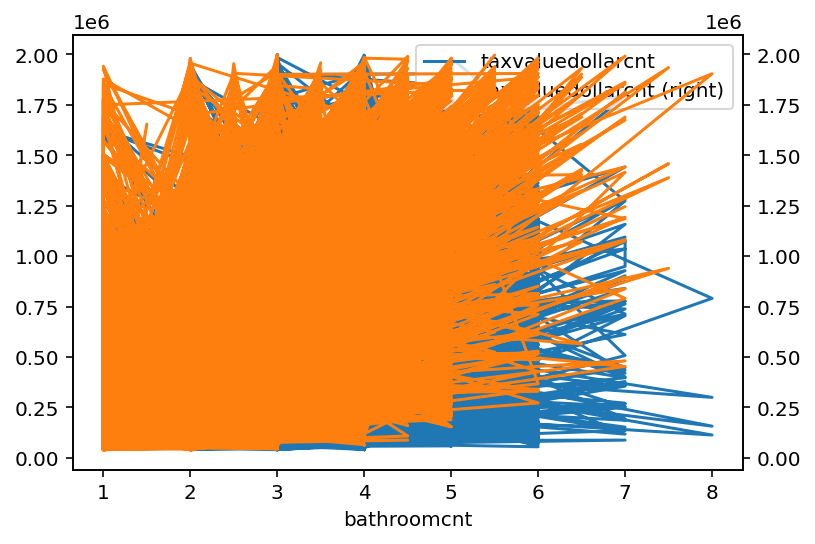

In [13]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'bedroomcnt', y = 'taxvaluedollarcnt', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
train.plot(x = 'bathroomcnt', y = 'taxvaluedollarcnt', ax = ax, secondary_y = True) 

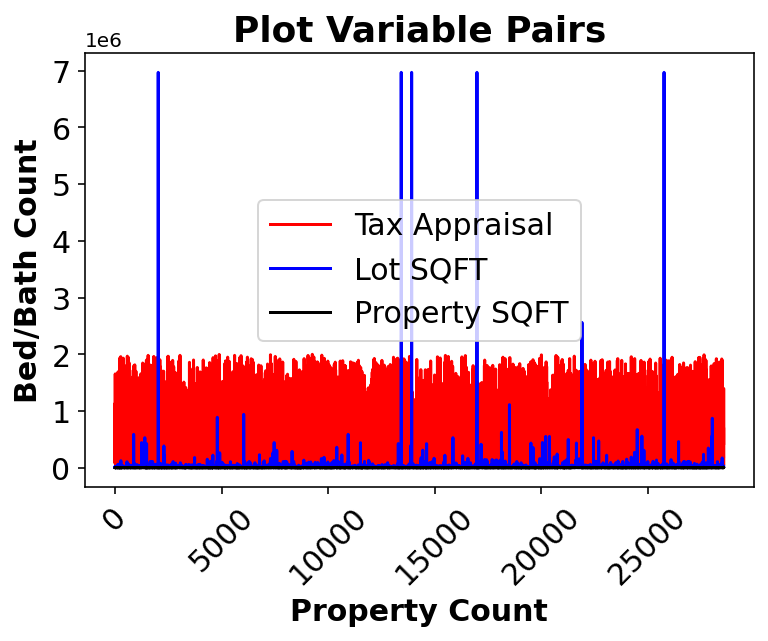

In [14]:
train['taxvaluedollarcnt'].plot(kind='line', color='red', label='Tax Appraisal')
train['lotsizesquarefeet'].plot(kind='line', color='blue', label='Lot SQFT')
train['calculatedfinishedsquarefeet'].plot(kind='line', color='black', label='Property SQFT')

plt.title('Plot Variable Pairs', fontsize=18, weight='bold')

plt.xlabel('Property Count', fontsize=15, weight='bold')
plt.xticks(fontsize=15, rotation=45)

plt.ylabel('Bed/Bath Count', fontsize=15, weight='bold')
plt.yticks(fontsize=15)

plt.legend(loc='center', fontsize=15)
plt.show()

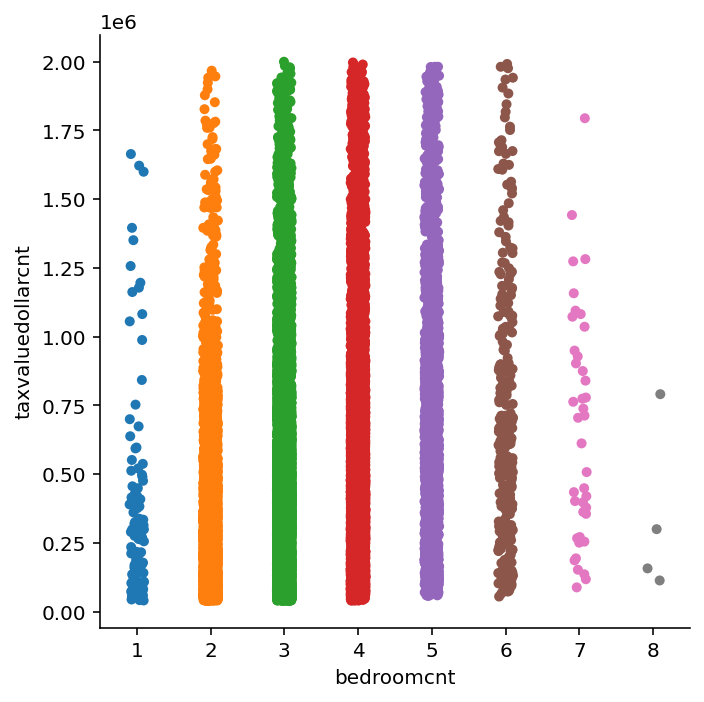

In [15]:
sns.catplot(data=train, y='taxvaluedollarcnt', x='bedroomcnt')

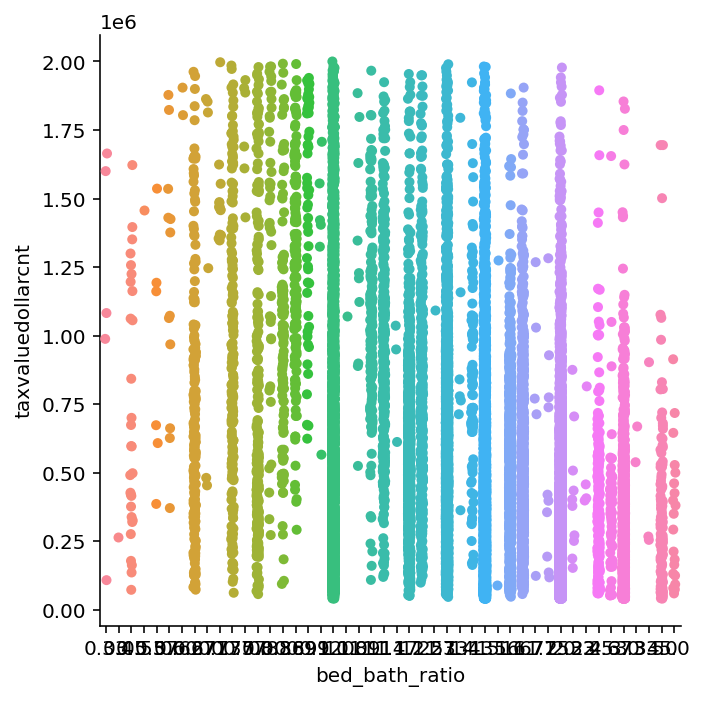

In [16]:
sns.catplot(data=train, y='taxvaluedollarcnt', x='bed_bath_ratio')

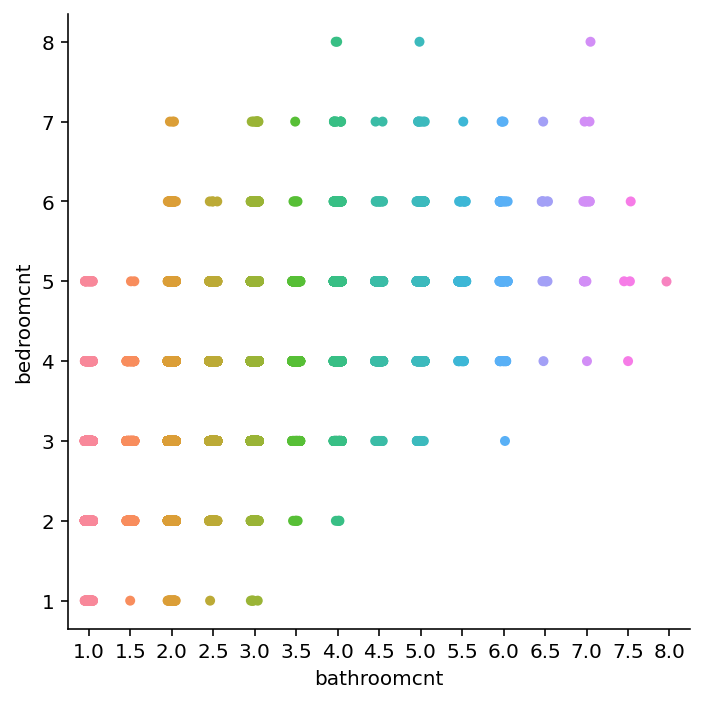

In [17]:
sns.catplot(data=train, y='bedroomcnt', x='bathroomcnt')

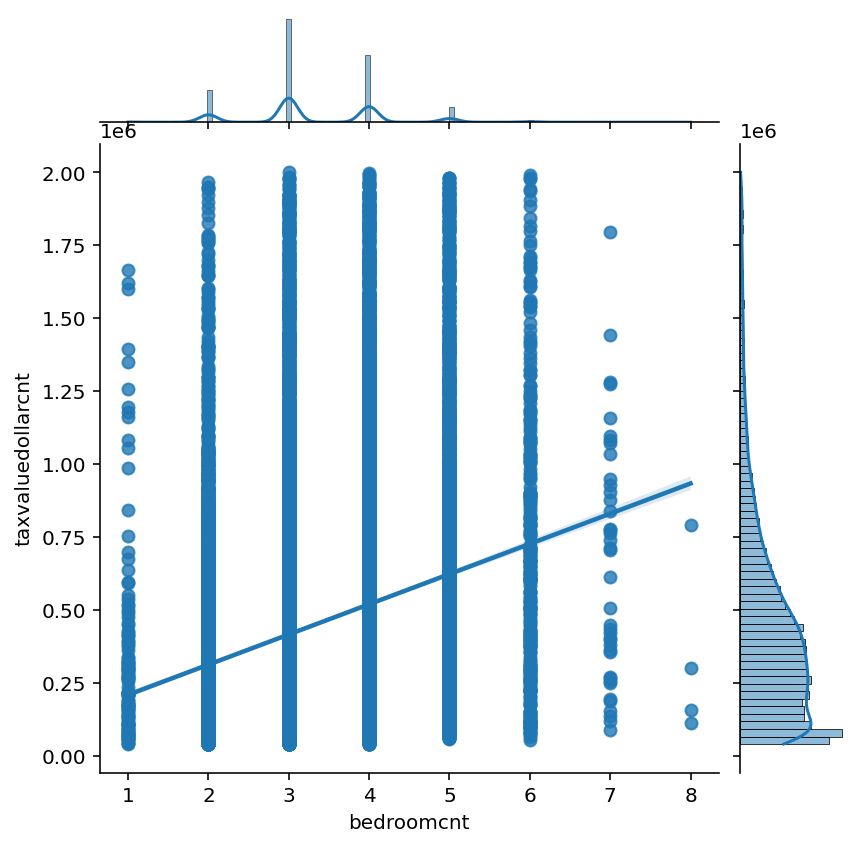

In [18]:
sns.jointplot(data=train.astype('float64'), x=train.bedroomcnt.astype('float64'), y=train.astype('float64').taxvaluedollarcnt, kind='reg')

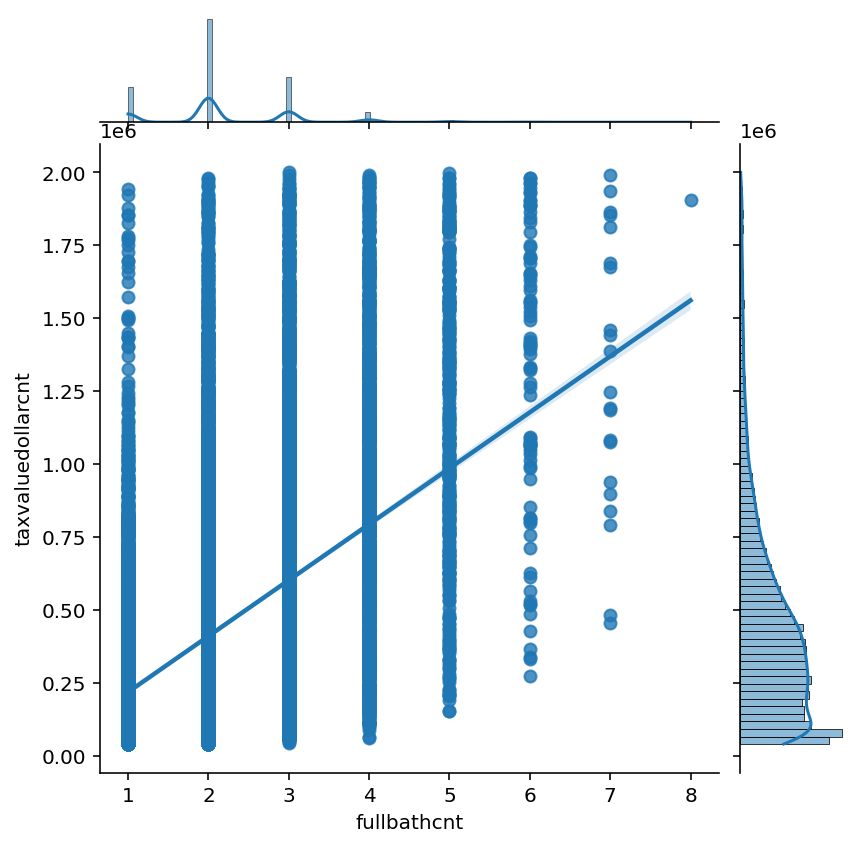

In [19]:
sns.jointplot(data=train.astype('float64'), x=train.fullbathcnt.astype('float64'), y=train.astype('float64').taxvaluedollarcnt, kind='reg')

Text(0.5, 1.0, 'Features Correlating with Tax Assessment Value')

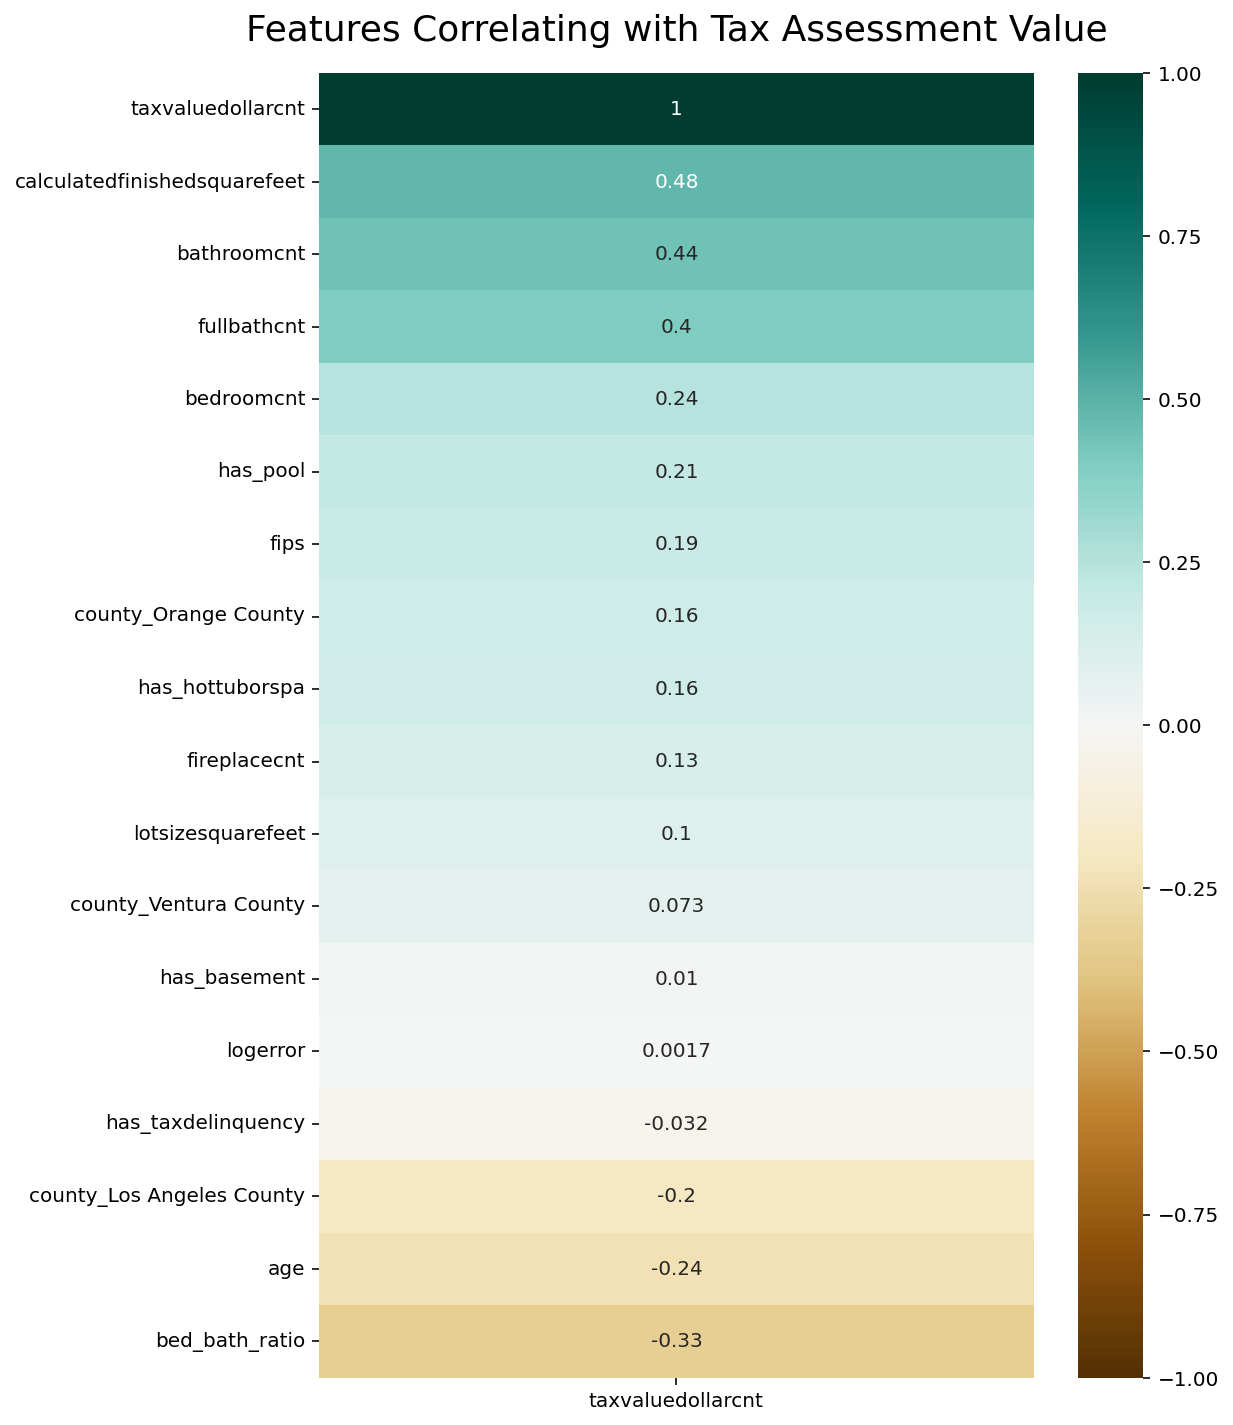

In [20]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['taxvaluedollarcnt']].sort_values(by='taxvaluedollarcnt', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Tax Assessment Value', fontdict={'fontsize':18}, pad=16)

In [21]:
def plot_variable_pairs(df, target):
    """
    Takes in a dataframe and target variable and plots each feature with the target variable
    """

    cols = df.columns.to_list()
    cols.remove(target) 
    for col in cols:
        sns.lmplot(x=col, y=target, data=df, line_kws={'color': 'red'})
    
    return plt.show()

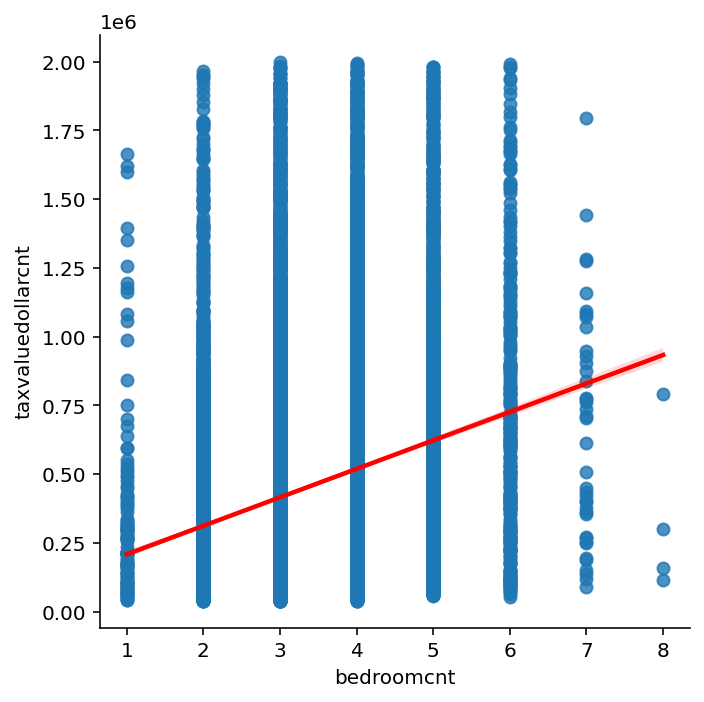

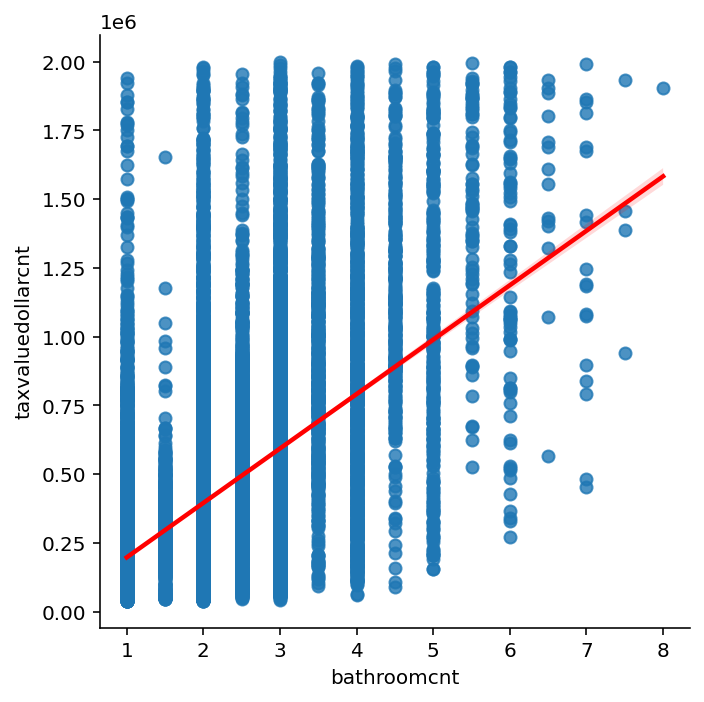

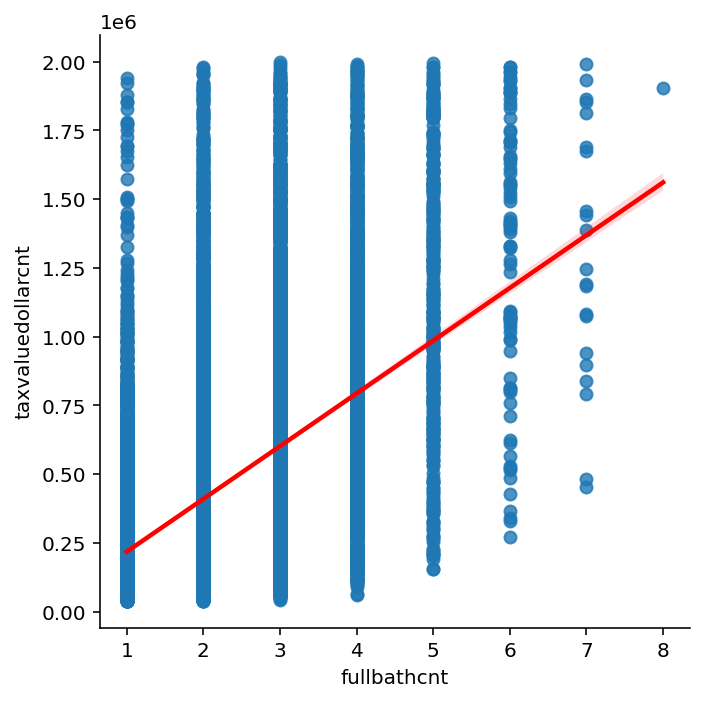

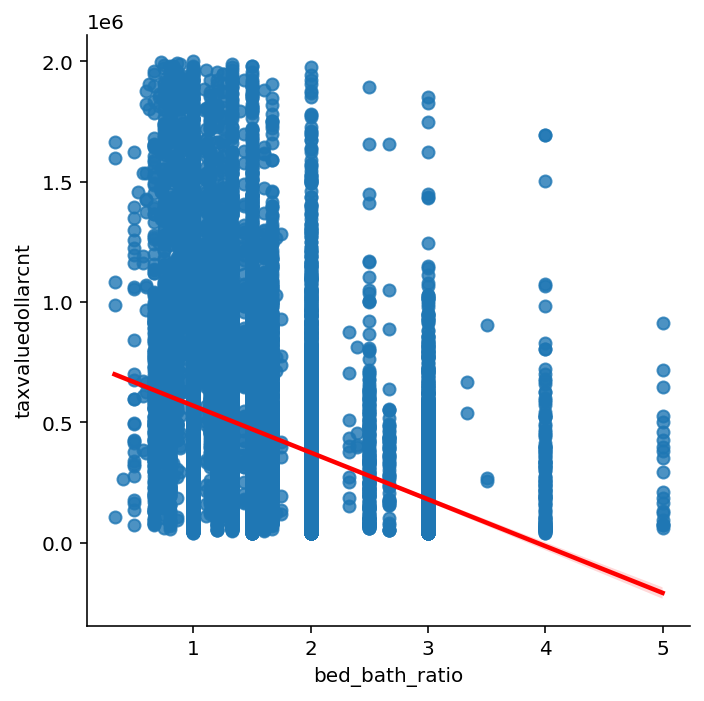

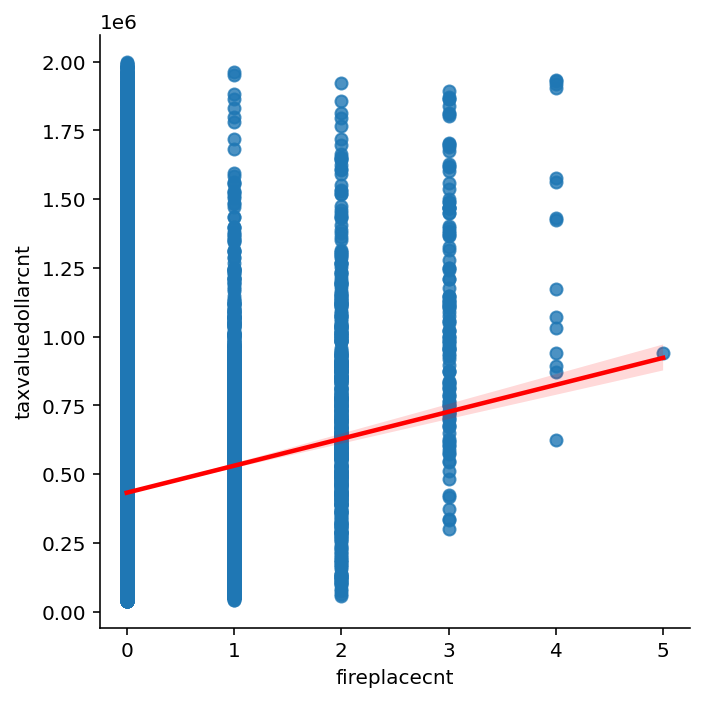

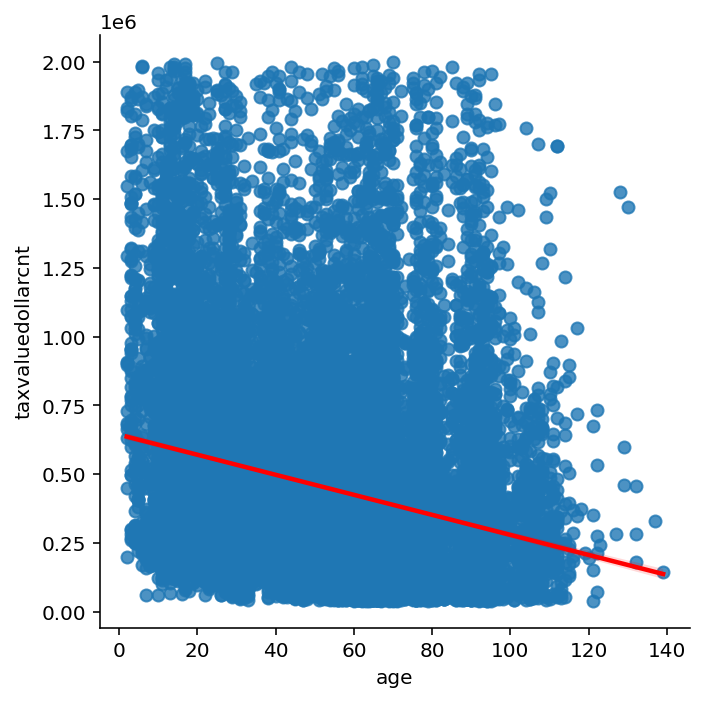

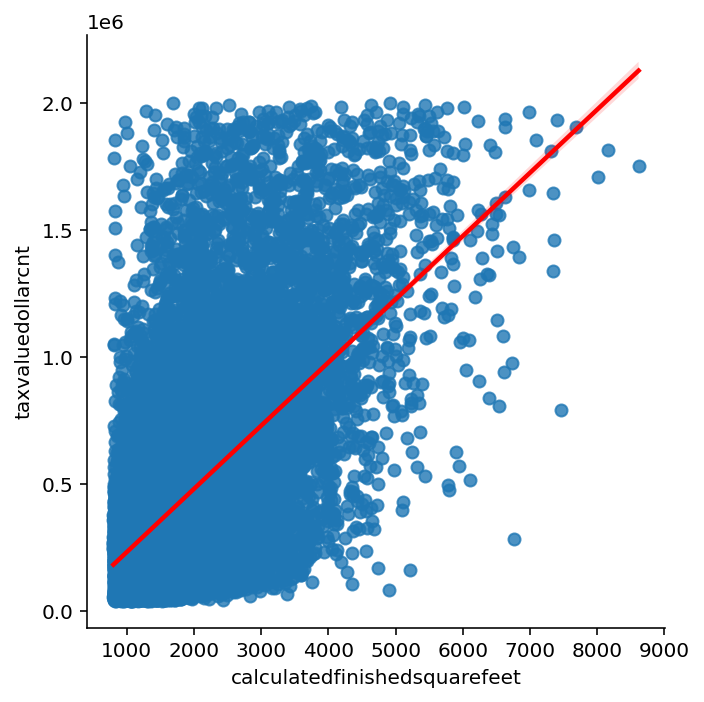

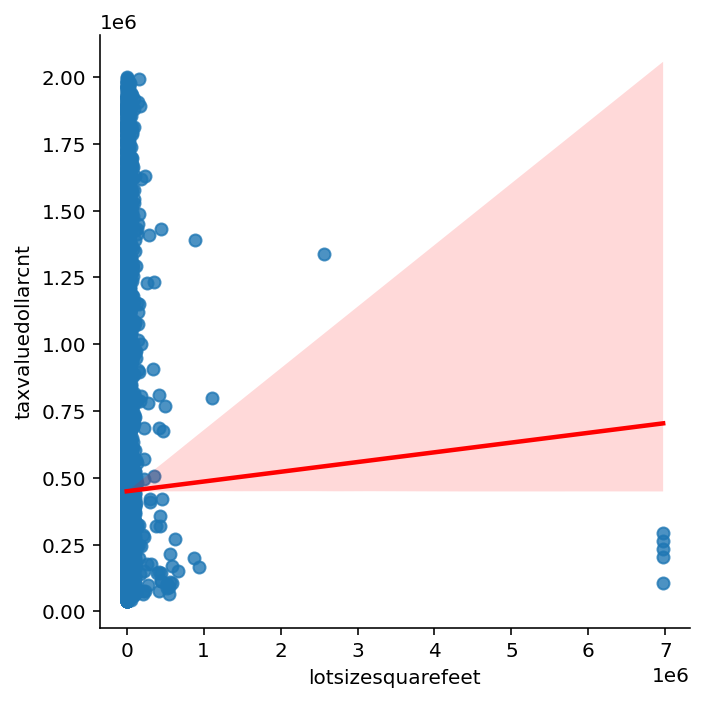

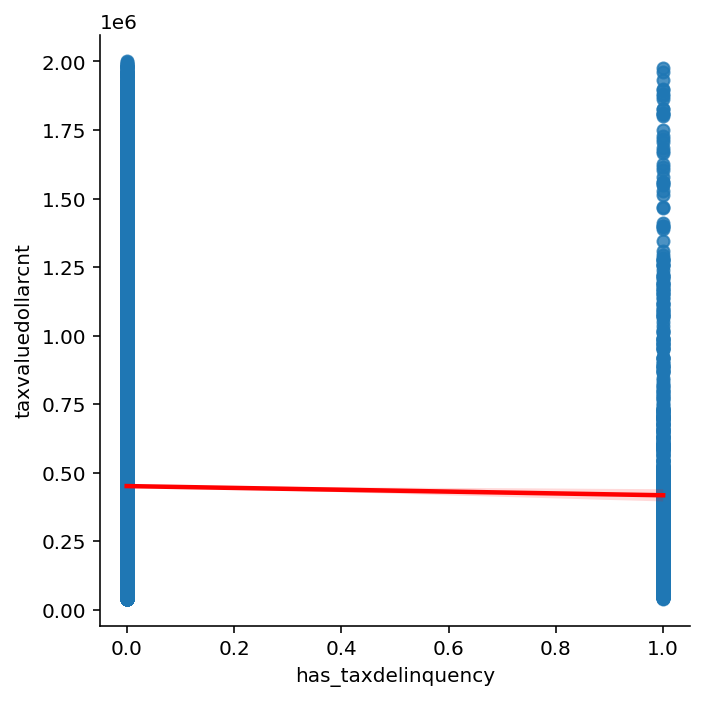

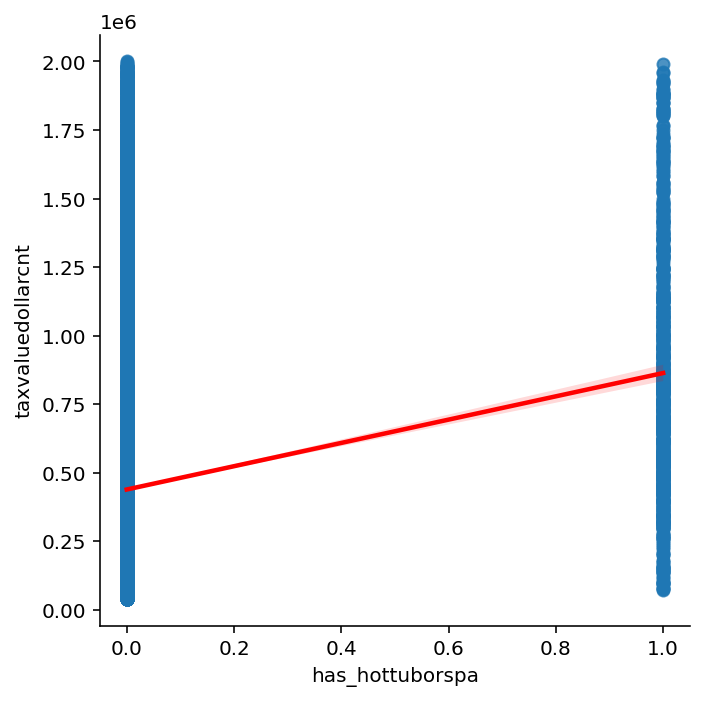

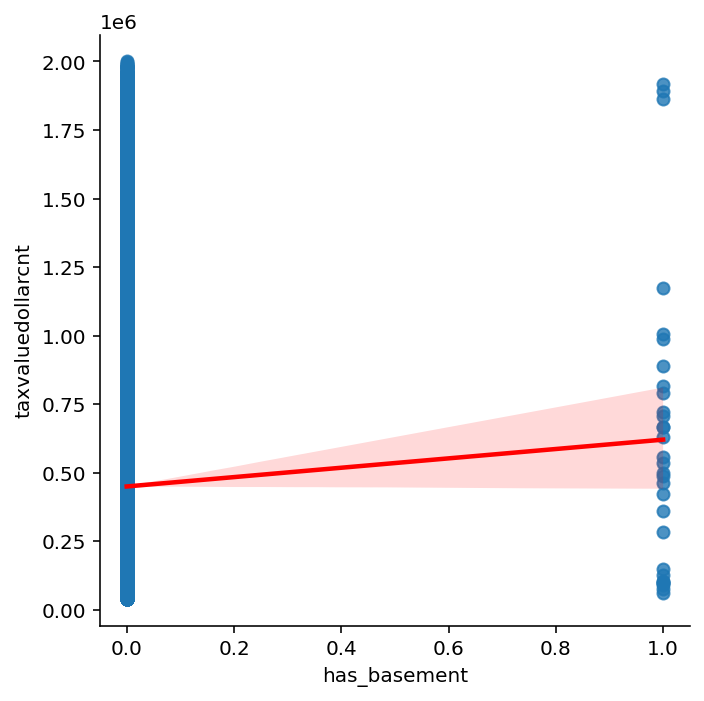

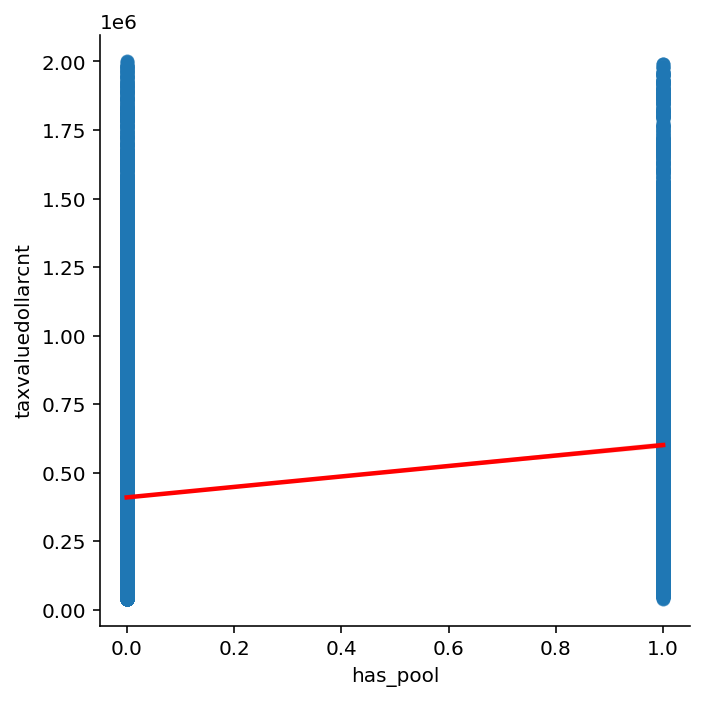

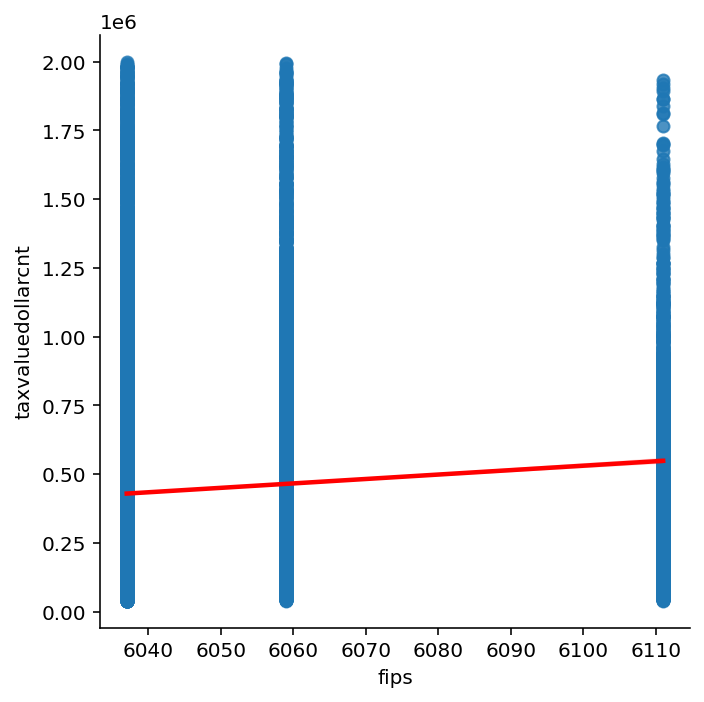

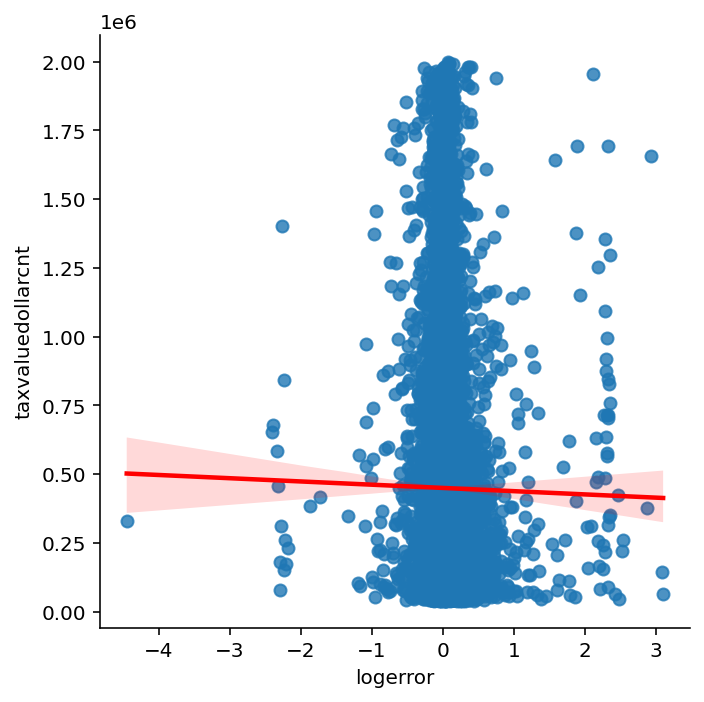

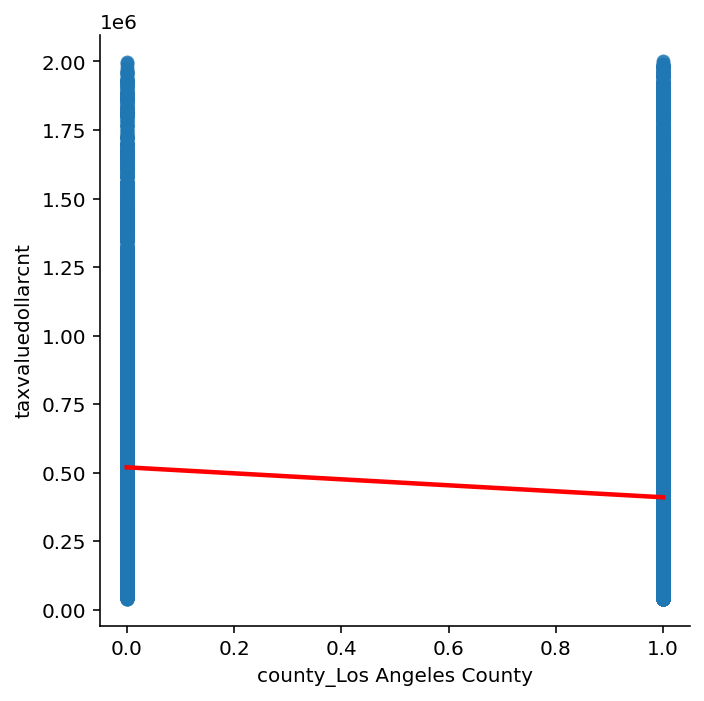

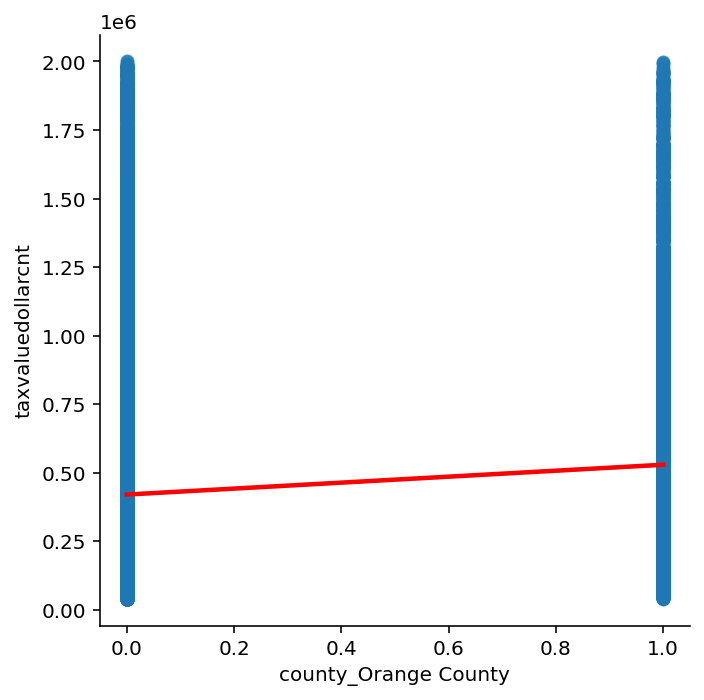

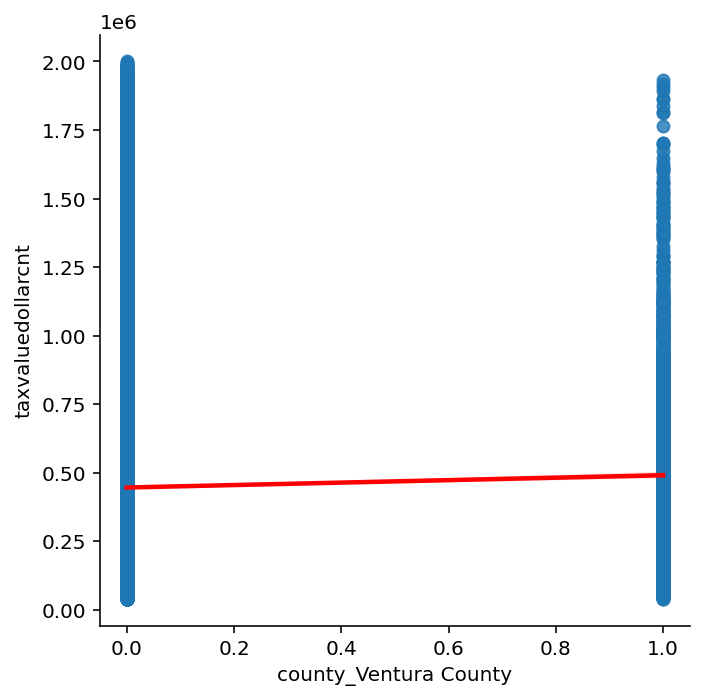

In [22]:
target = 'taxvaluedollarcnt'
plot_variable_pairs(train.astype('float64'), target)

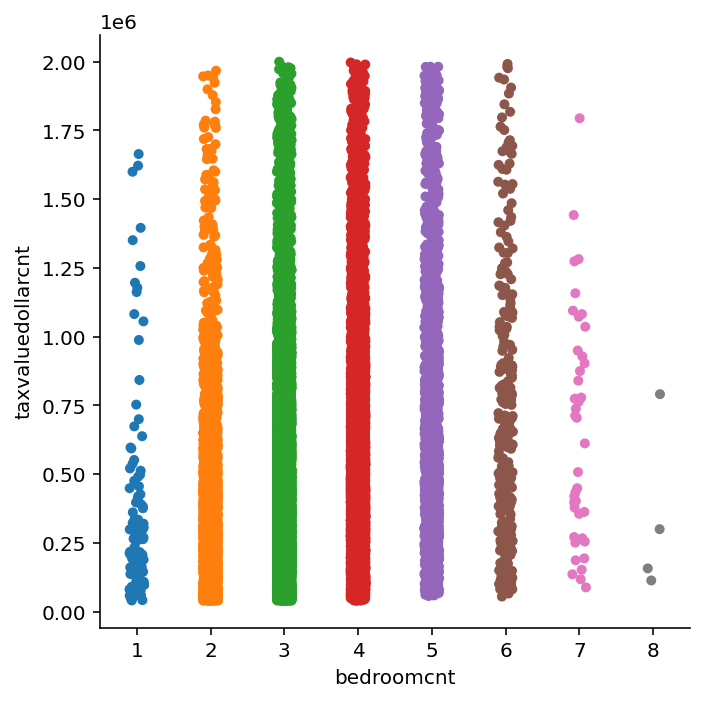

In [23]:
sns.catplot(data=train, x="bedroomcnt", y="taxvaluedollarcnt")

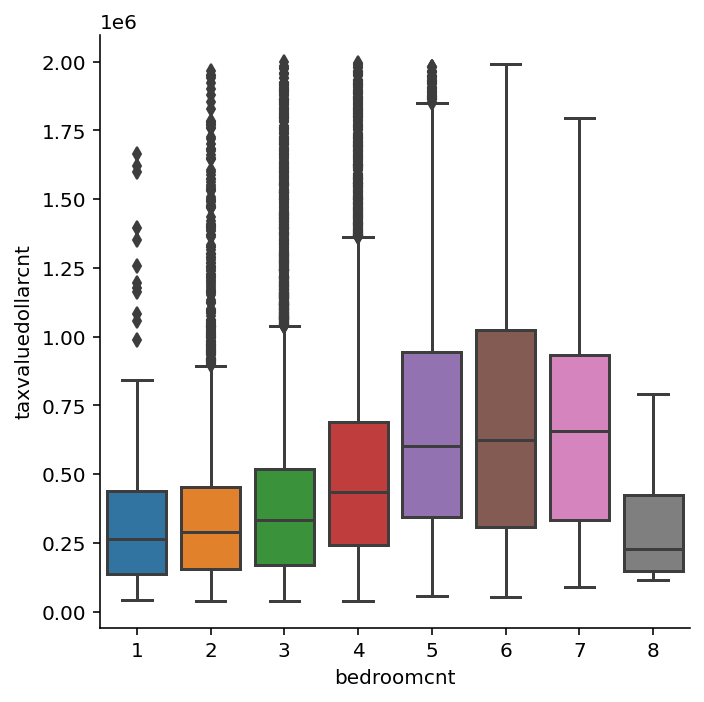

In [24]:
sns.catplot(data=train, x="bedroomcnt", y="taxvaluedollarcnt", kind="box")

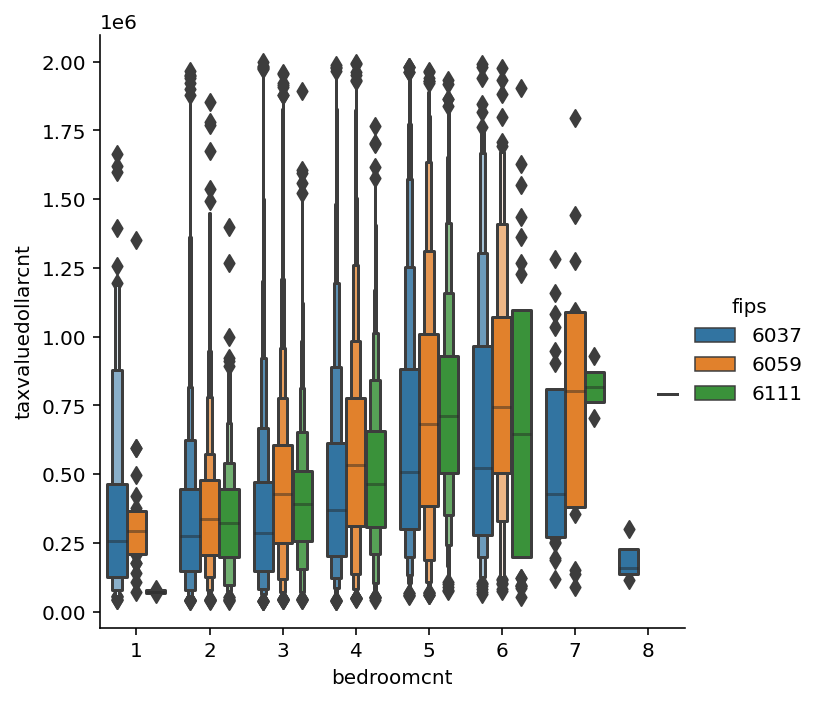

In [25]:
sns.catplot(data=train, x="bedroomcnt", y="taxvaluedollarcnt", hue="fips", kind="boxen")

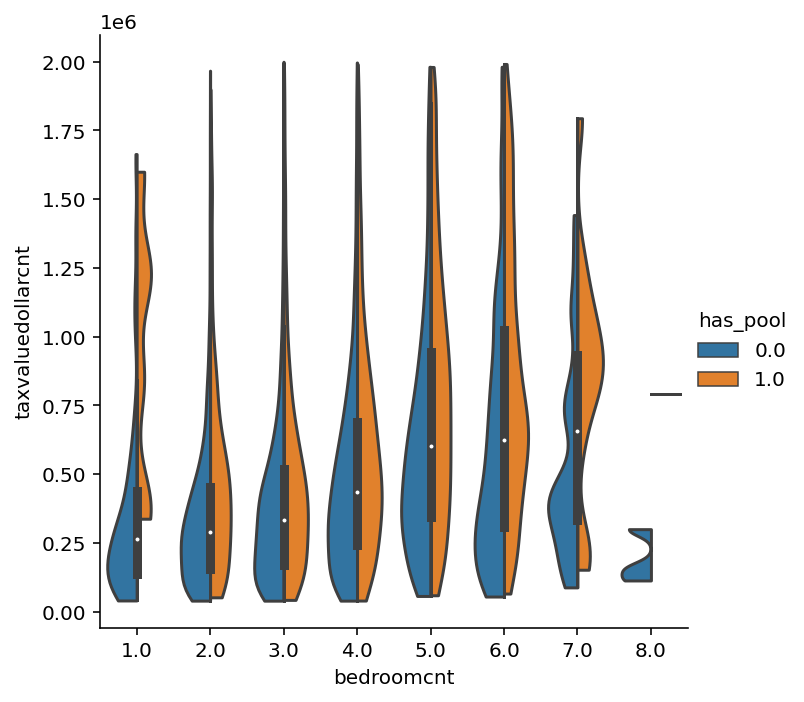

In [26]:
sns.catplot(
    data=train.astype('float64'), x="bedroomcnt", y="taxvaluedollarcnt", hue="has_pool",
    kind="violin", bw=.25, cut=0, split=True)

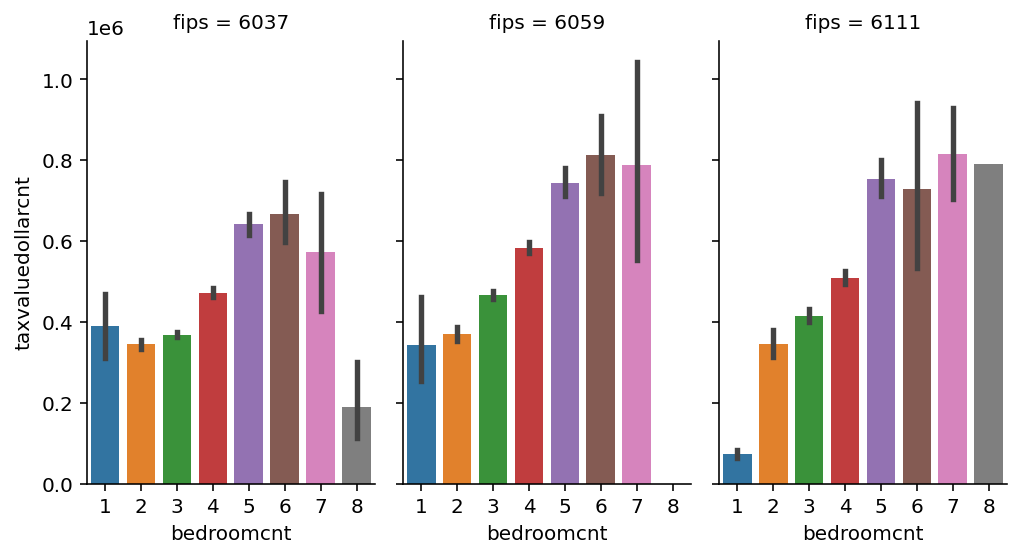

In [27]:
sns.catplot(
    data=train, x="bedroomcnt", y="taxvaluedollarcnt", col="fips",
    kind="bar", height=4, aspect=.6,
)

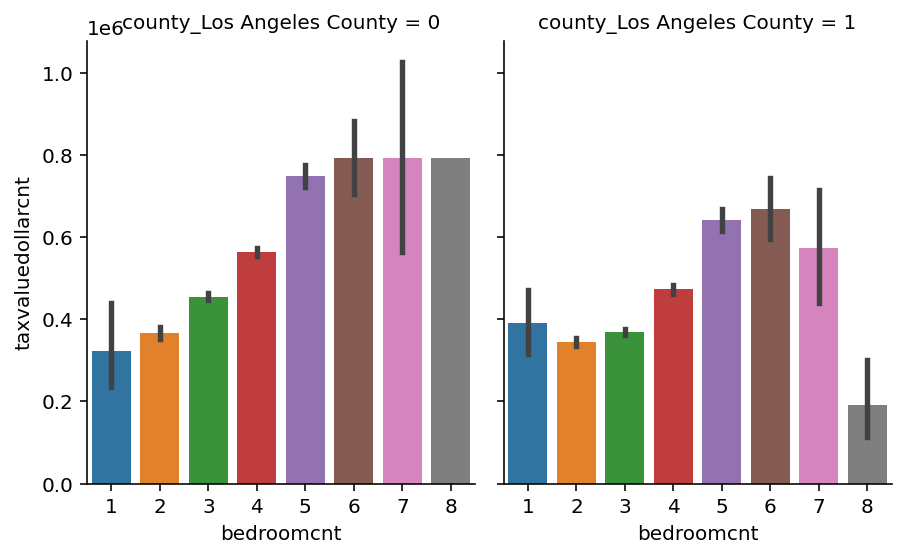

In [28]:
sns.catplot(
    data=train, x="bedroomcnt", y="taxvaluedollarcnt", col="county_Los Angeles County",
    kind="bar", height=4, aspect=.8,
)

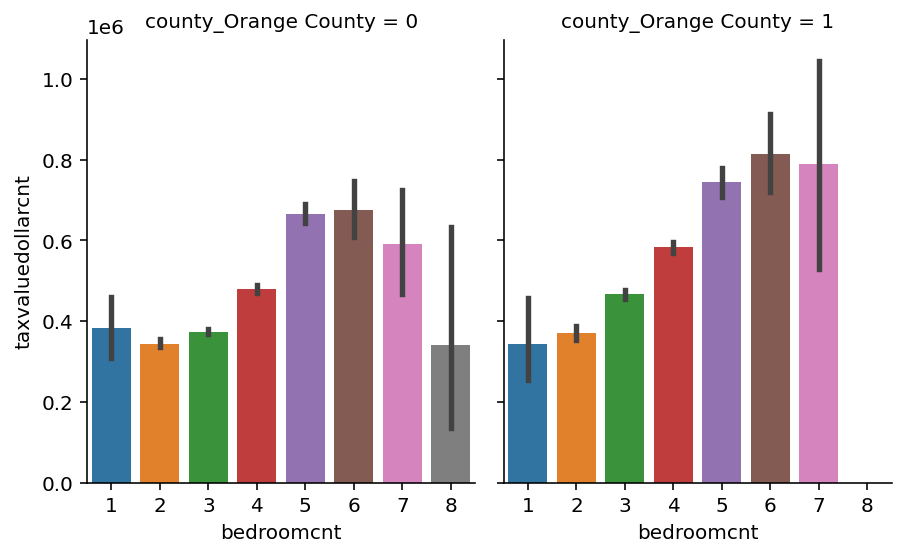

In [29]:
sns.catplot(
    data=train, x="bedroomcnt", y="taxvaluedollarcnt", col="county_Orange County",
    kind="bar", height=4, aspect=.8,
)

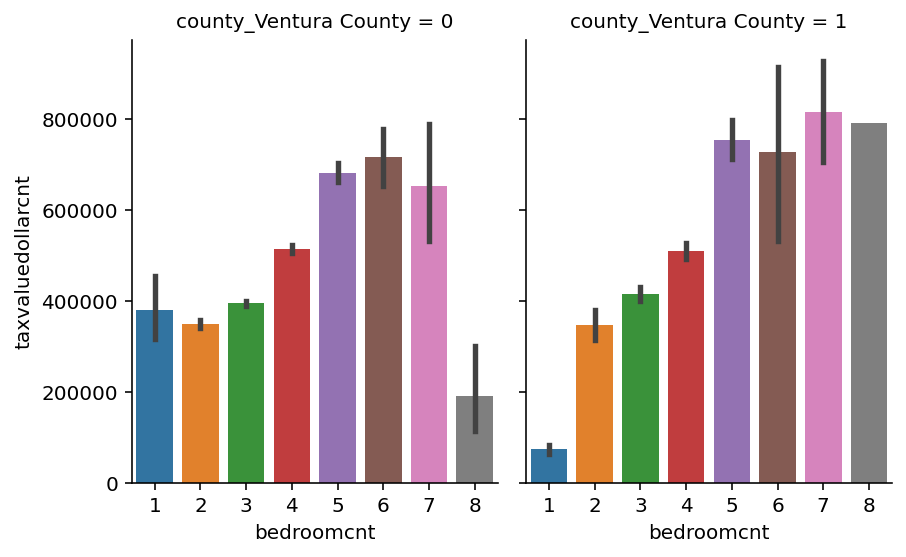

In [30]:
sns.catplot(
    data=train, x="bedroomcnt", y="taxvaluedollarcnt", col="county_Ventura County",
    kind="bar", height=4, aspect=.8,
)

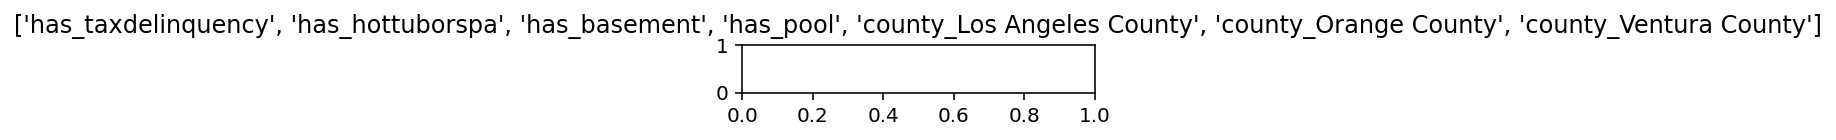

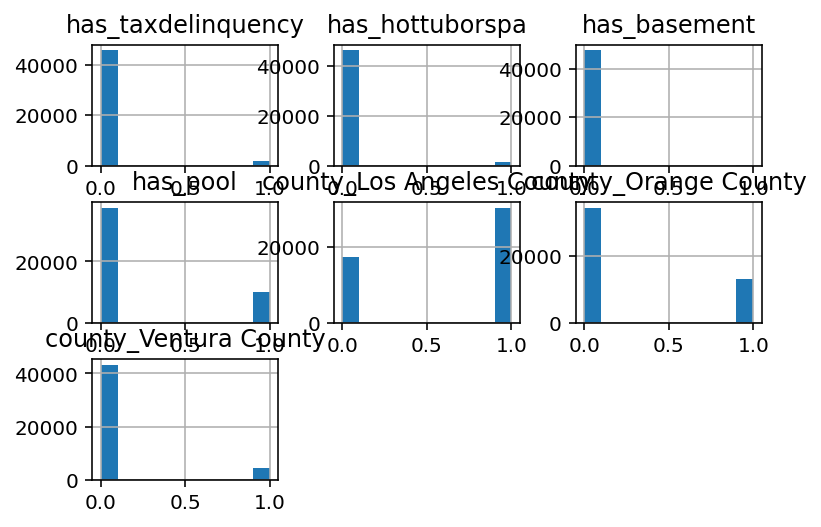

In [31]:
plt.figure(figsize=(60, 2))

# List of columns
cols = [zcat]
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(4,16,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

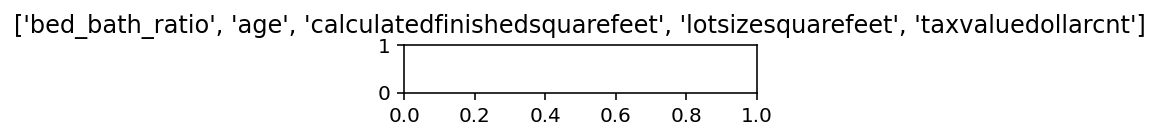

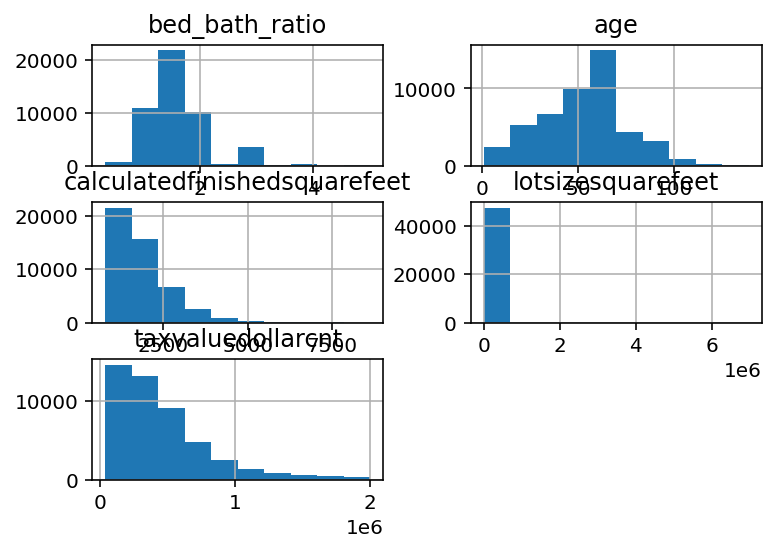

In [32]:
plt.figure(figsize=(60, 2))

# List of columns
cols = [zcont]
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(4,16,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

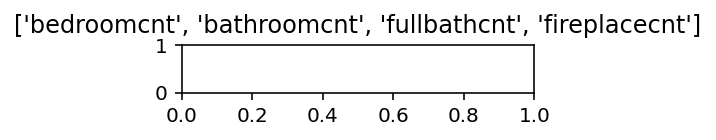

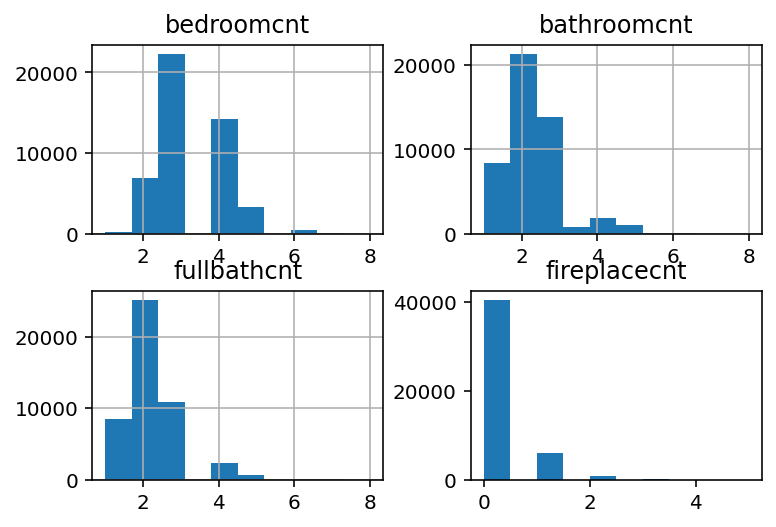

In [33]:
plt.figure(figsize=(60, 2))

# List of columns
cols = [zcount]
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(4,16,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

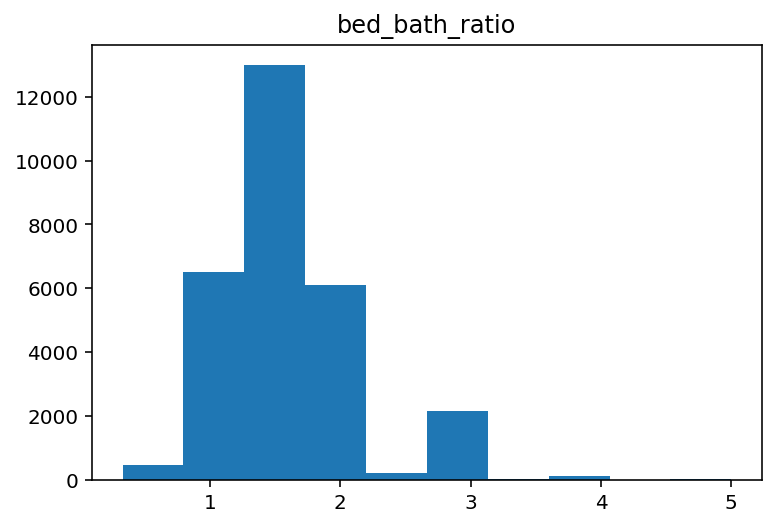

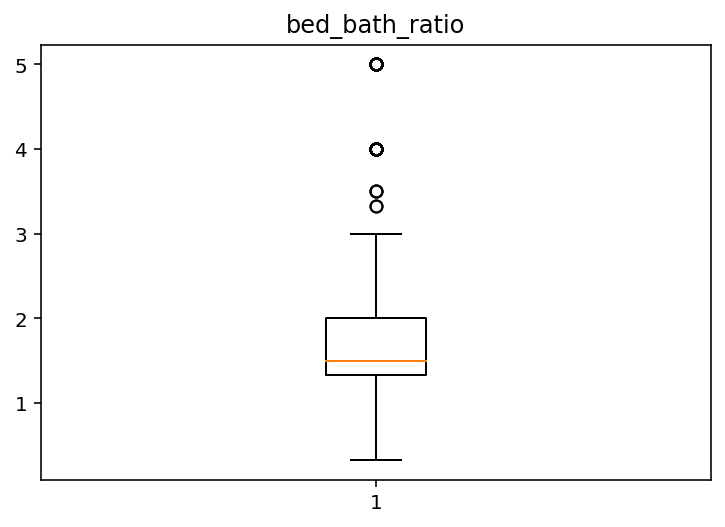

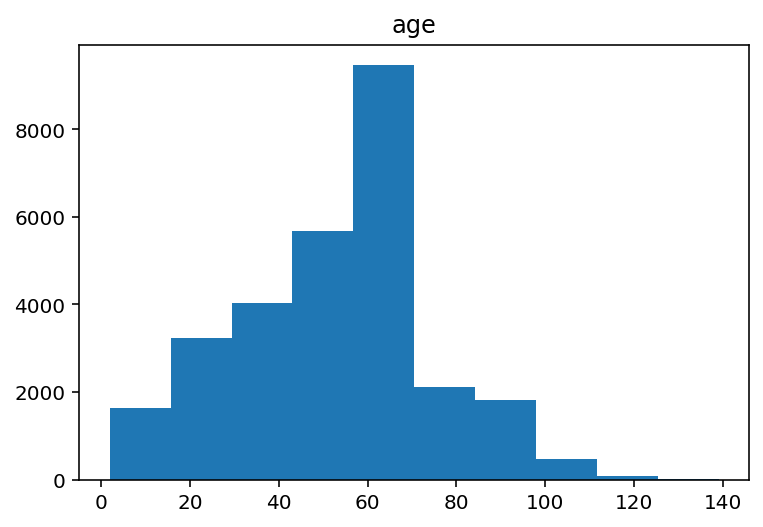

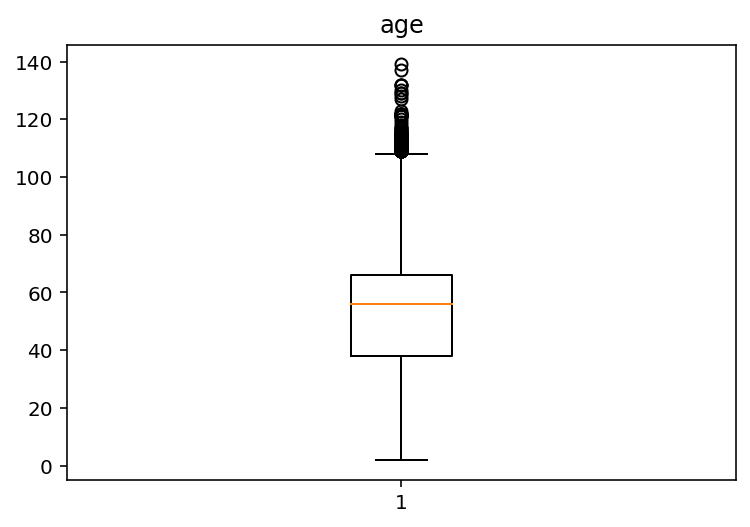

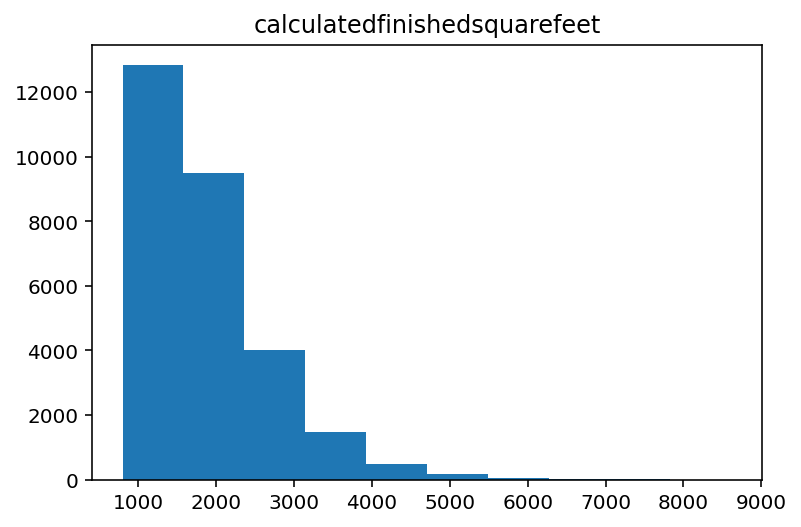

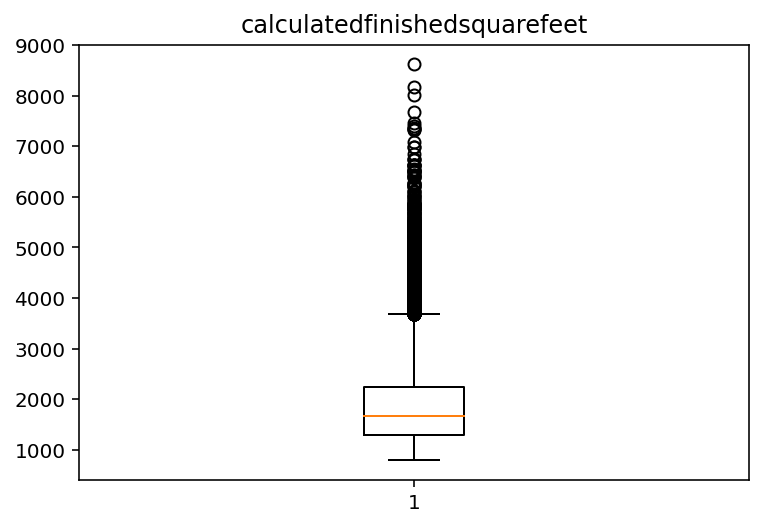

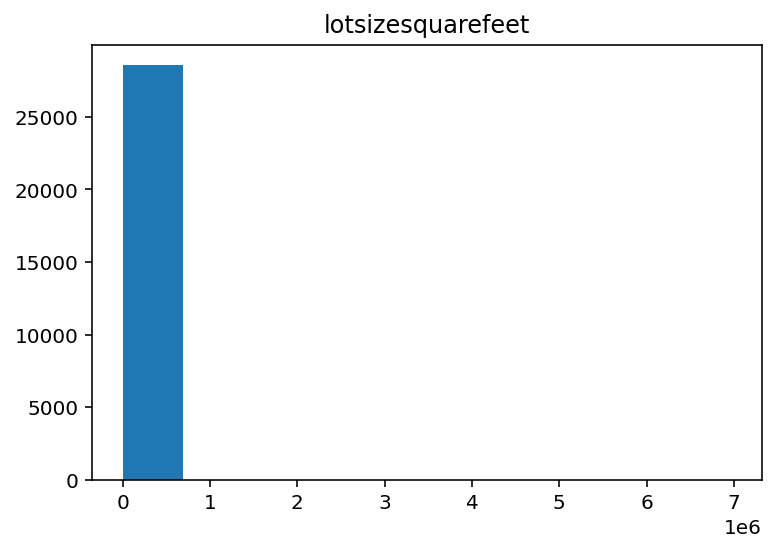

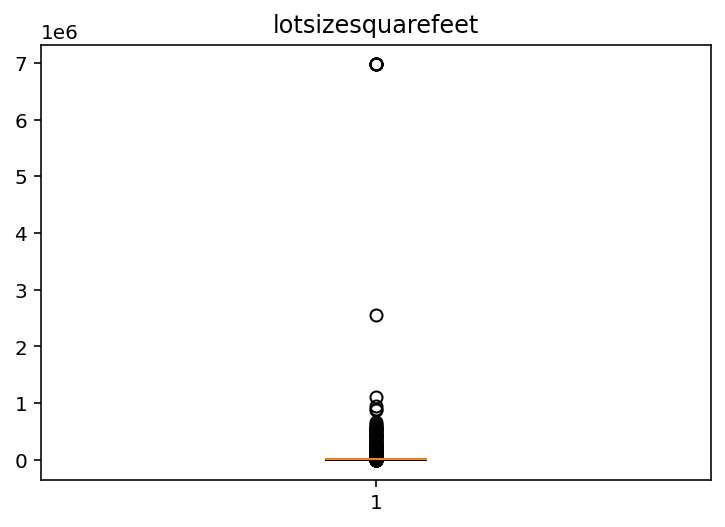

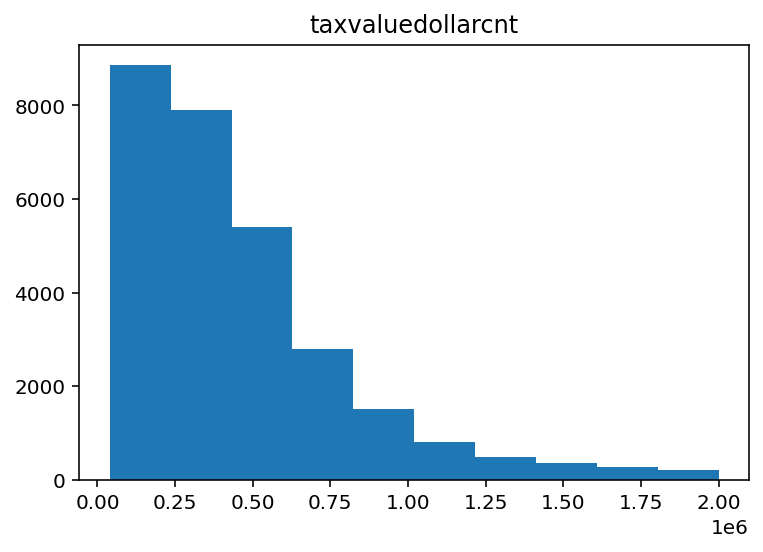

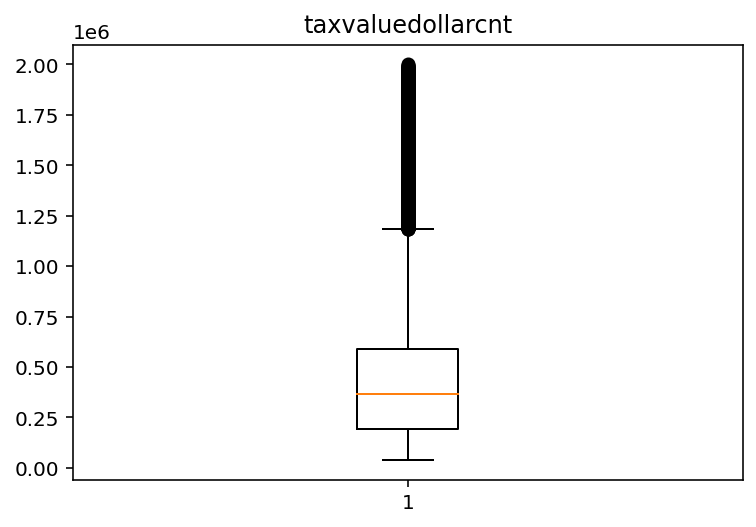

In [34]:
# Plot numeric columns
for col in zcont:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [35]:
categorical_target = 'has_pool'

combos = [
    ('calculatedfinishedsquarefeet', 'taxvaluedollarcnt')
#    ('internet_service_type_DSL', 'internet_service_type_Fiber optic')
#    ('sepal_length', 'petal_length'),
#    ('sepal_width', 'petal_width'),
#    ('sepal_length', 'petal_width'),
#    ('sepal_width', 'petal_length')
]

In [36]:
x = combos[0][0]
y = combos[0][1]
def scatter_chart(x, y):
    for churn, subset in train.groupby(categorical_target):
        plt.scatter(subset[x], subset[y], label = churn)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

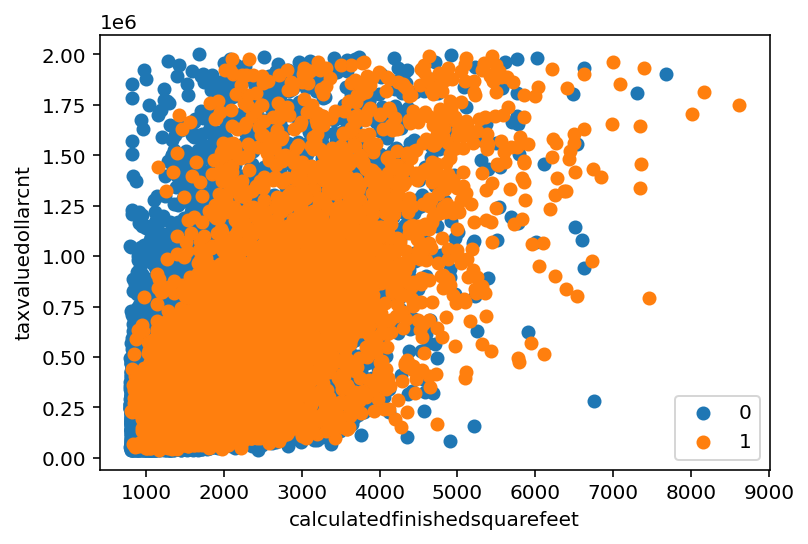

In [37]:
scatter_chart(x, y)

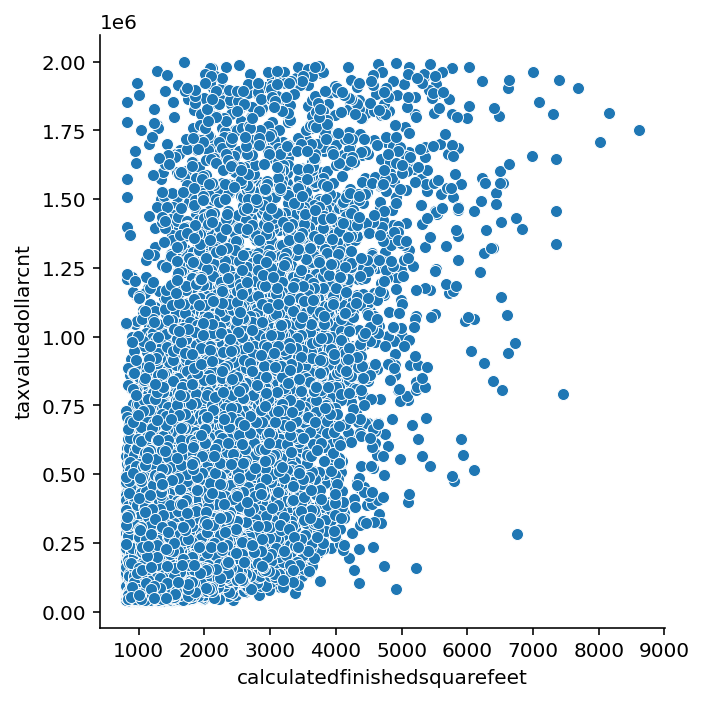

In [38]:
sns.relplot(data=train, x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt')
plt.show()

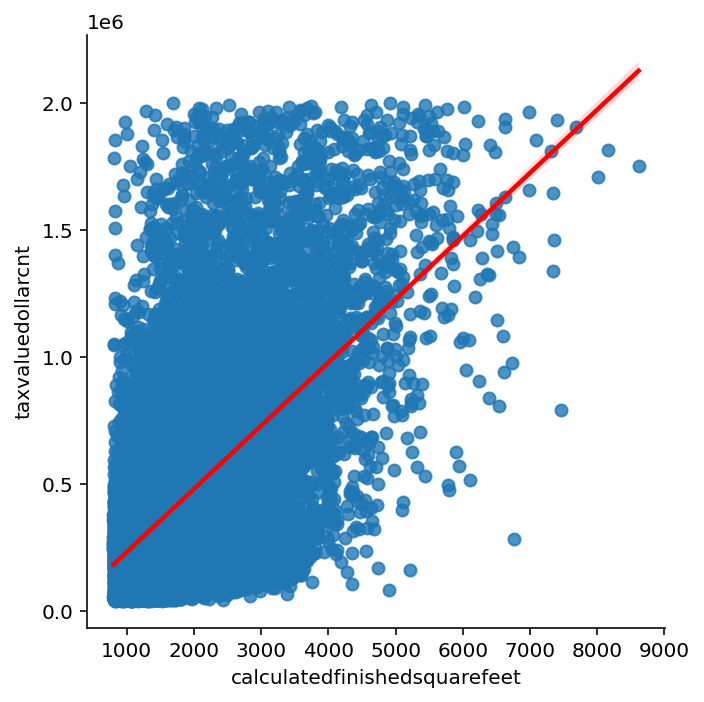

In [39]:
# I can really pop that line color if I want
sns.lmplot(data=train.astype('float64'), x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt',
           line_kws={'color':'red'})
plt.show()

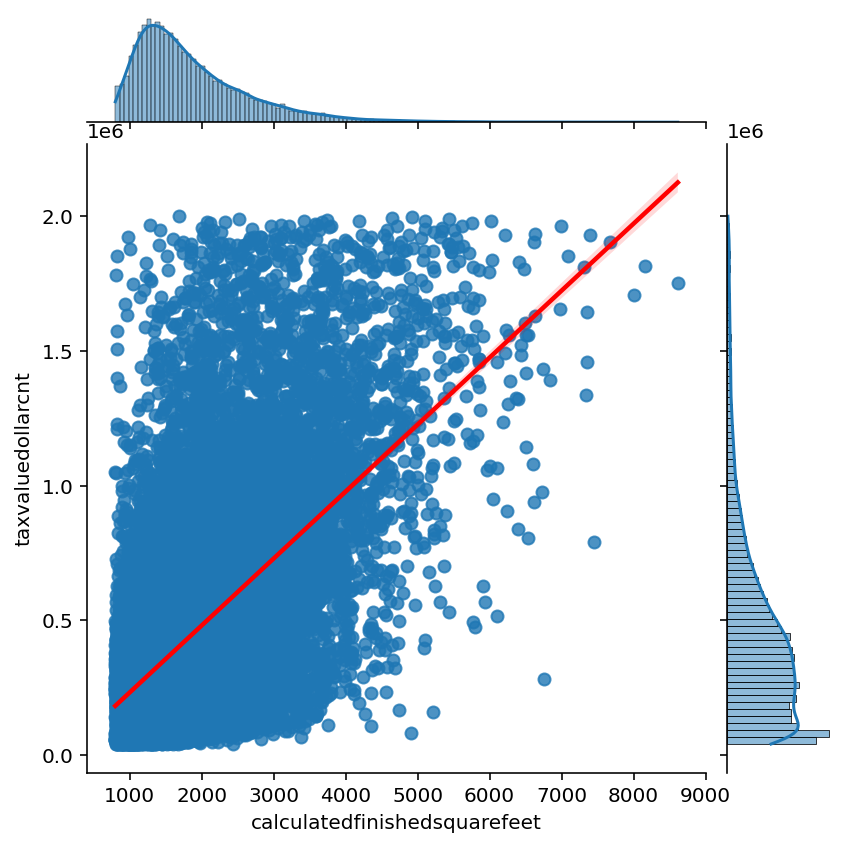

In [40]:
sns.jointplot(data=train.astype('float64'), x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt',
             kind='reg', line_kws={'color':'red'})
plt.show()

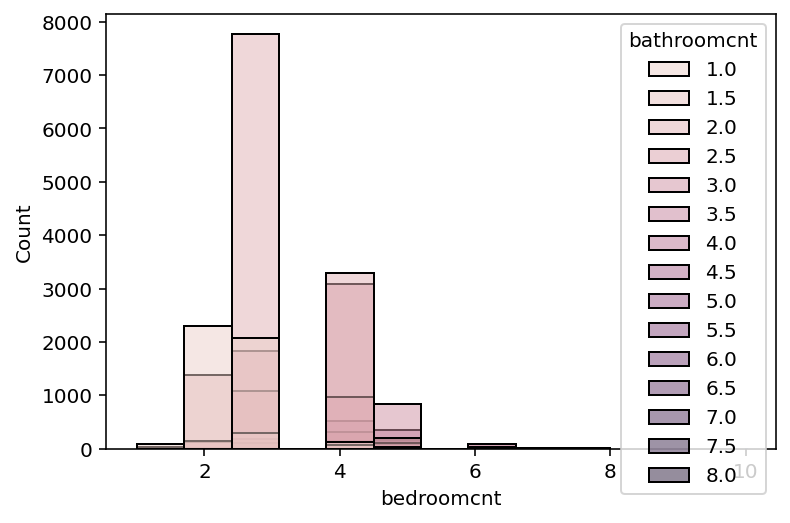

In [41]:
#seaborn histplot 
sns.histplot(data=train.astype('float64'), x='bedroomcnt', 
             hue='bathroomcnt', bins=10)

#set line for passing level
plt.vlines(10, 0, 10)
plt.show()

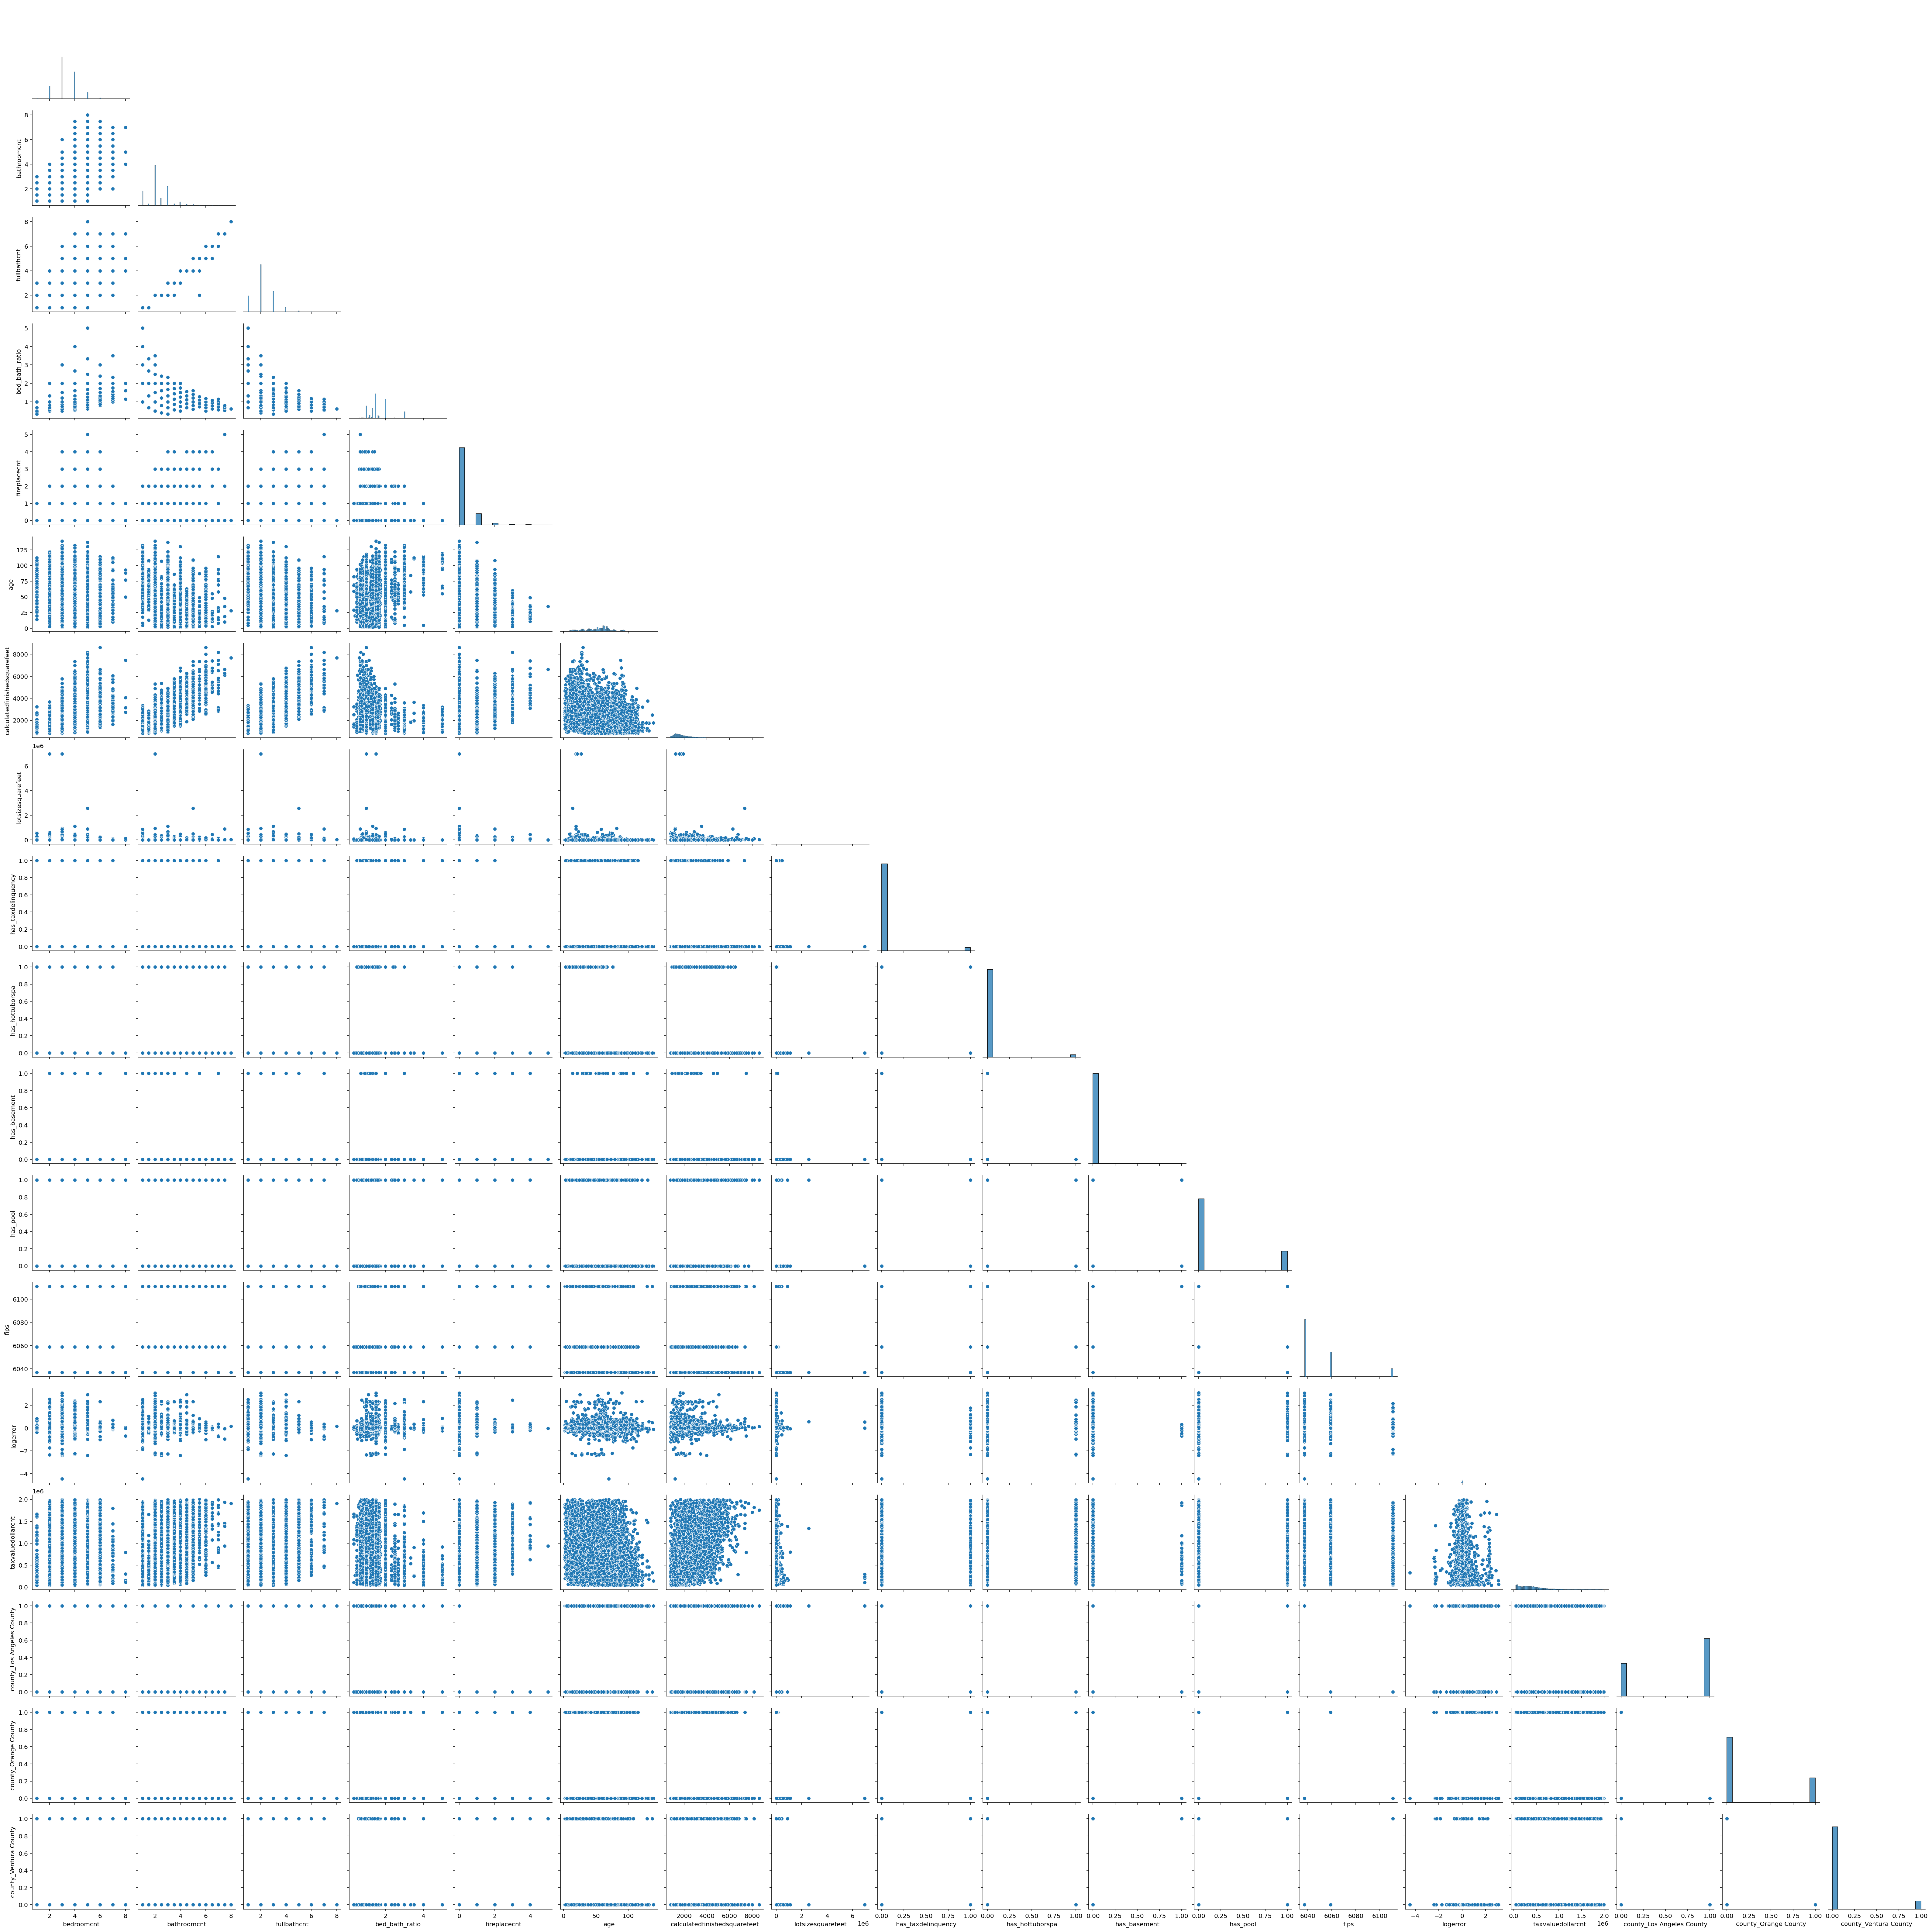

In [42]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=train.astype('float64'),
            corner=True)
plt.show()

In [43]:
# create the correlation matrix using pandas .corr()
target_corr = train[zcount].corr(method='pearson')
target_corr

bedroomcnt  bathroomcnt  fullbathcnt  fireplacecnt
bedroomcnt      1.000000     0.605090     0.596720      0.153297
bathroomcnt     0.605090     1.000000     0.981036      0.161626
fullbathcnt     0.596720     0.981036     1.000000      0.111862
fireplacecnt    0.153297     0.161626     0.111862      1.000000

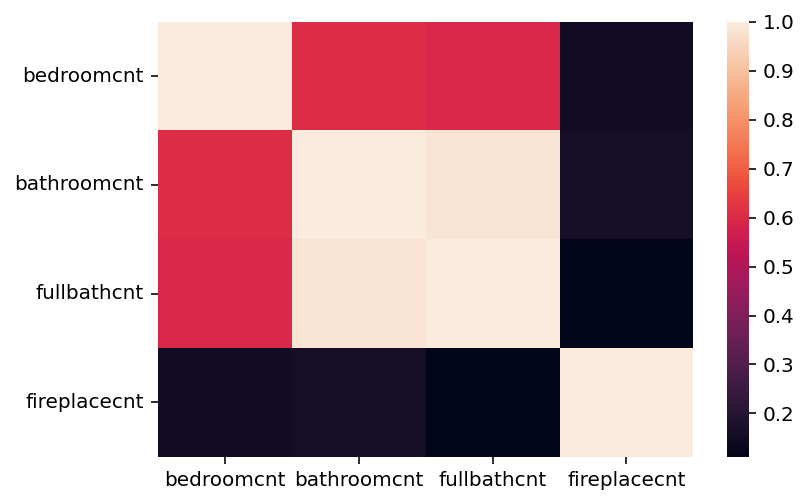

In [44]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(target_corr)
plt.show()

In [45]:
np.triu(exam_corr)

array([[1.        , 0.60508988, 0.59671985, 0.15329724],
       [0.        , 1.        , 0.98103598, 0.16162641],
       [0.        , 0.        , 1.        , 0.11186181],
       [0.        , 0.        , 0.        , 1.        ]])

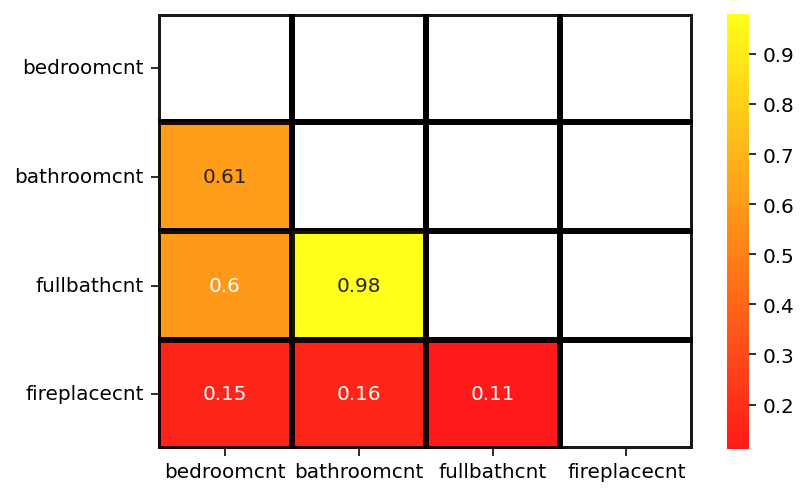

In [46]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(exam_corr, cmap='autumn', annot=True, 
            mask=np.triu(exam_corr), **kwargs)
plt.show()

# ANALYSIS
<div class="alert alert-success">
* TARGET = CHURN

## What do I want to ask?
    
### 1. Is there a relationship between Tenure and Churn?
* ```Tenure``` has a significant ```relationship``` with ```Churn```.

### 1.1 Is the average Tenure of Active customers greater than the average tenure of churned customers?
* The ```average Tenure``` of ```Active``` customers is ```less than or equal``` to the ```average Tenure``` of customers that ```Churn```.
    
### 2. Is there a relationship between Monthly Charges and Churn?  
* ```Monthly Charges``` has a significant ```Relationship``` with ```Churn```.  
    
### 2.1 Are the average monthly charges of customers that Churn higher than the average monthly charges of Active customers?
* The ```average monthly charges``` of customers that ```Churn``` are ```less than or equal``` to the ```average monthly charges``` of ```Active``` customers.

### 3. Is there a relationship between tech support and Churn?**  
* ```Tech Support``` has **NO** significant ```Relationship``` with ```Churn```**
    
### 3.1 Do customers with tech support churn less than customers without tech support?**  
* answer

</div>

<div class="alert alert-success">



# Include at least 4 visualizations in the form of:
* Question in markdown that you want to answer
* Visualization
* Statistical test (in at least 2 of your 4)
* Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration.

<div class="alert alert-warning">


# Q1: Does Property Squarefoot impact the Property Tax Assessment Value?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (calculatedfinishedsquarefeet, taxvaluedollarcnt)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (calculatedfinishedsquarefeet, taxvaluedollarcnt)**  
  
  
 * Continuous or Discreat?  
  **Continuous (calculatedfinishedsquarefeet) vs Continuous (taxvaluedollarcnt) = Pearson’s R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The property Tax Assesed Value is **NOT** ```dependent``` on the property squarefoot**.   
      * ```taxvaluedollarcnt``` != ```calculatedfinishedsquarefeet```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The property Tax Assesed Value is ```dependent``` on the property squarefoot**.  
      * ```taxvaluedollarcnt``` == ```calculatedfinishedsquarefeet```

## Visualization

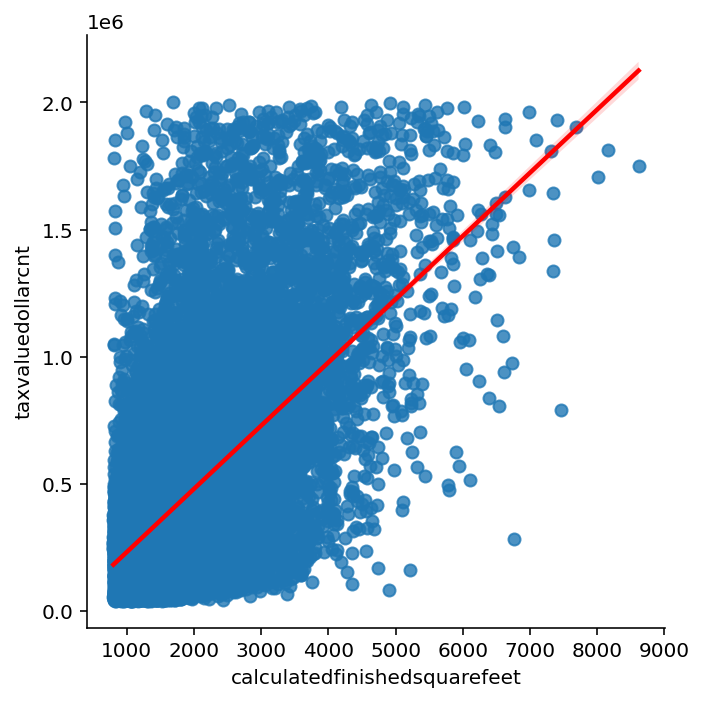

In [47]:
sns.lmplot(x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data=train.astype('float64'), line_kws={'color': 'red'})
plt.show()

Text(0.5, 1.0, 'Features Correlating with Property Square Foot')

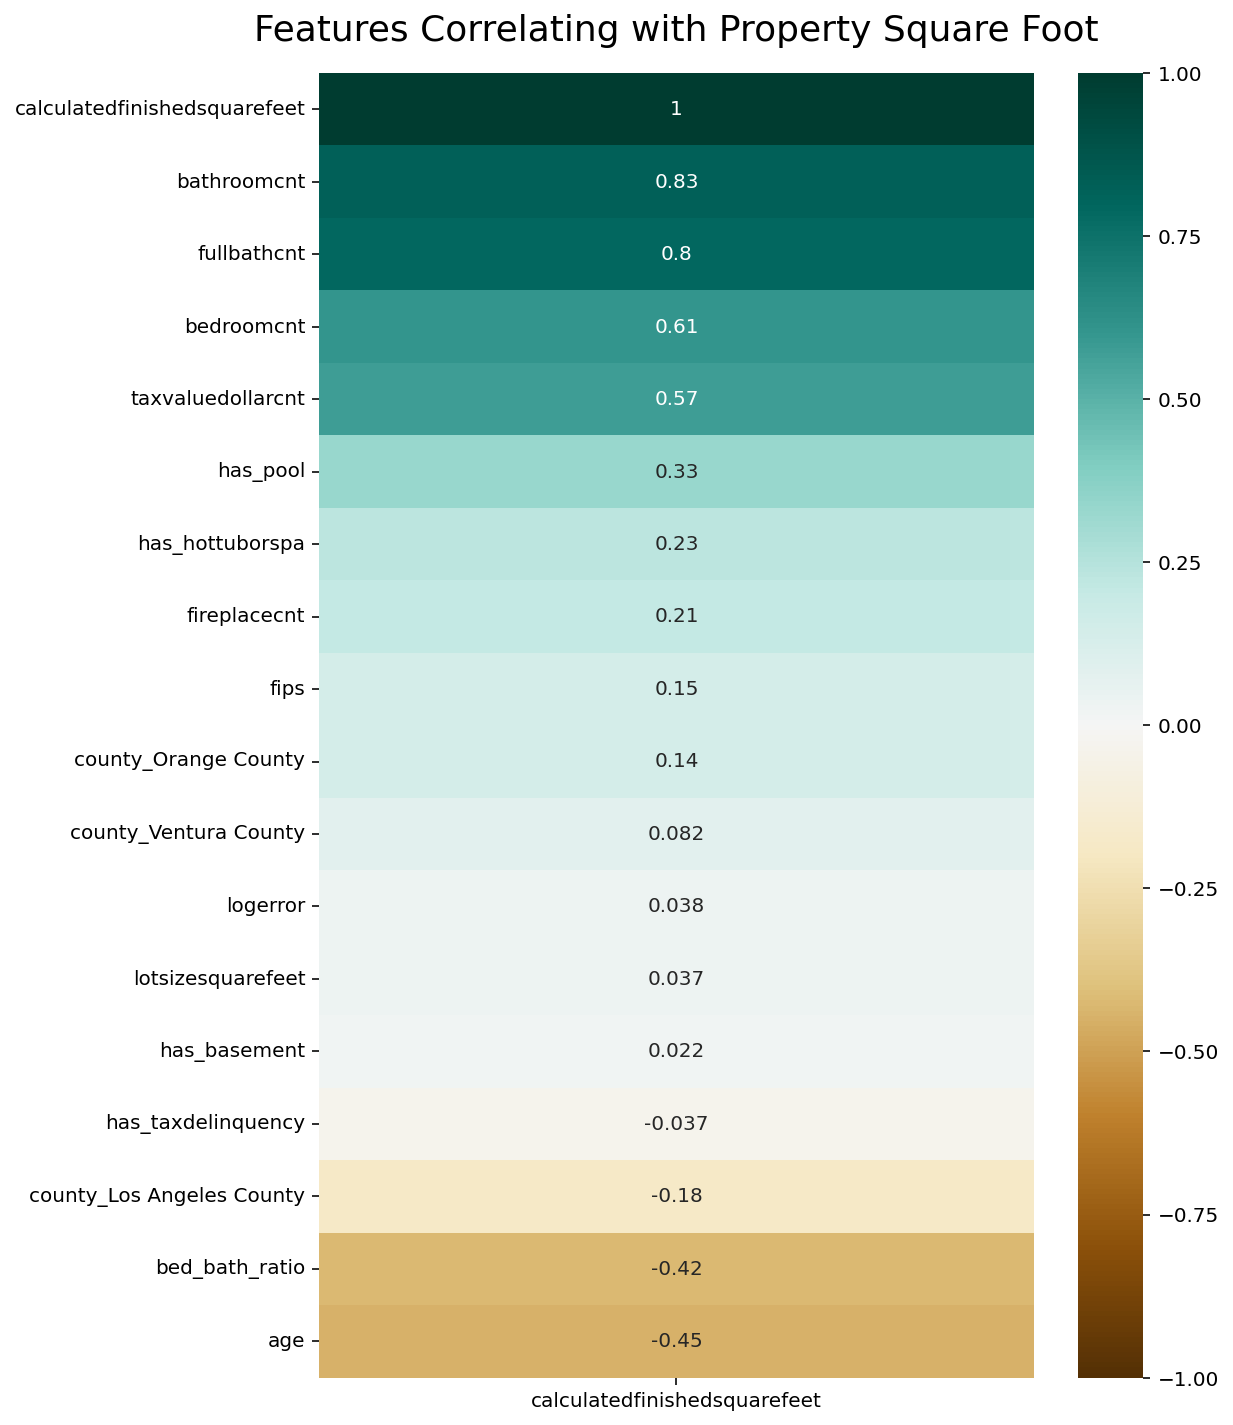

In [48]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['calculatedfinishedsquarefeet']].sort_values(by='calculatedfinishedsquarefeet', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Property Square Foot', fontdict={'fontsize':18}, pad=16)

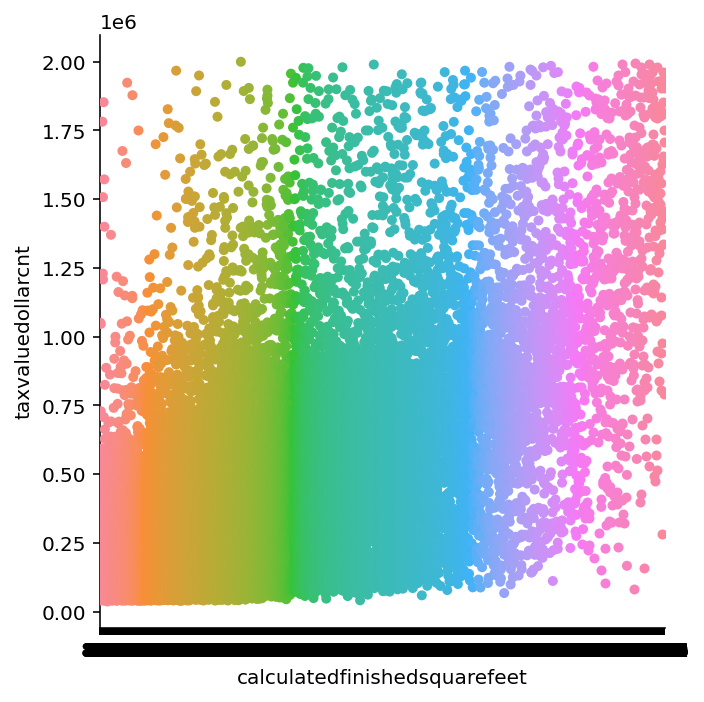

In [49]:
sns.catplot(data=train, y='taxvaluedollarcnt', x='calculatedfinishedsquarefeet')

<AxesSubplot:xlabel='calculatedfinishedsquarefeet'>

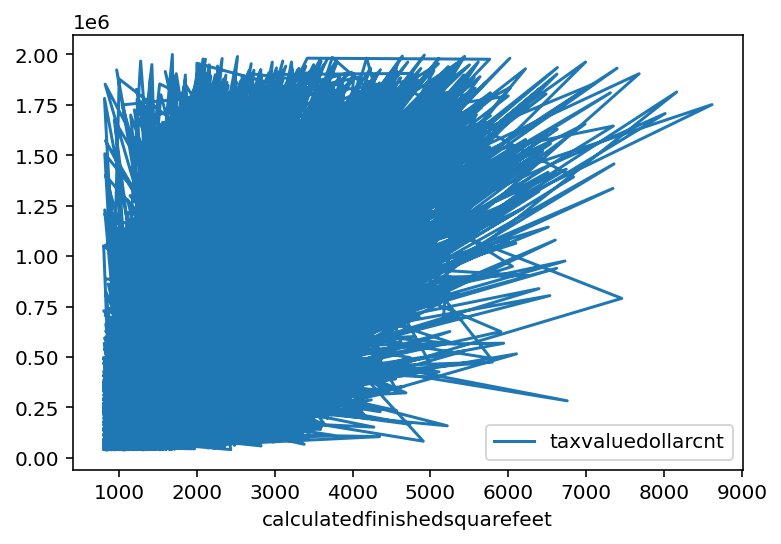

In [50]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
#df.plot(x = 'lotsizesquarefeet', y = 'taxvaluedollarcnt', ax = ax, secondary_y = True) 

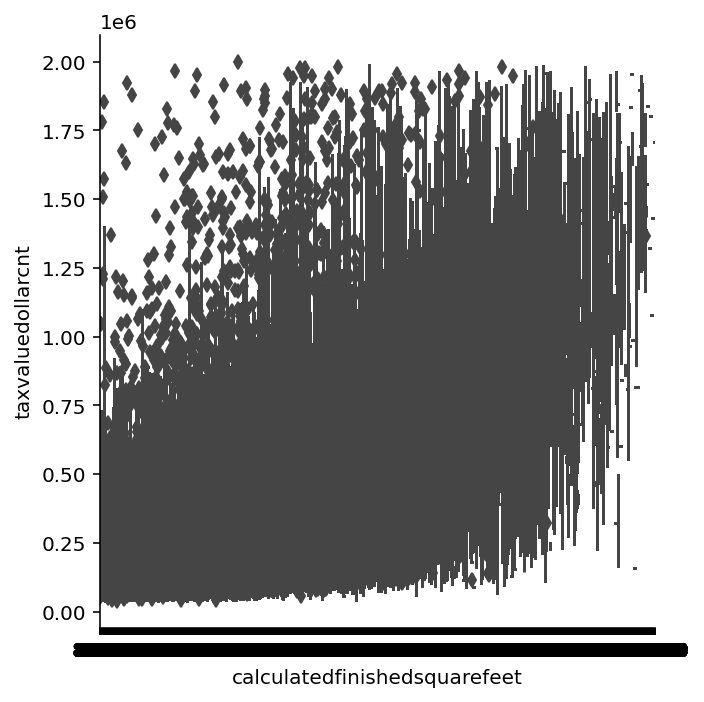

In [51]:
sns.catplot(data=train.astype('float64'), x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt", kind="box")

## Test Hypothesis

<div class="alert alert-warning">



# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [52]:
r, p_val = stats.pearsonr(train.calculatedfinishedsquarefeet,
                      train.taxvaluedollarcnt)
r, p_val

(0.5741420017374894, 0.0)

In [53]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the property squarefoot

<div class="alert alert-warning">


# Q2: Does the number of Bedrooms impact the Tax Assesment Value?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (bedroomcnt, taxvaluedollarcnt)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (bedroomcnt, taxvaluedollarcnt)**  
  
  
 * Continuous or Discreat?  
  **Continuous (bedroomcnt) vs Continuous (taxvaluedollarcnt) = Pearson’s R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The property Tax Assesed Value is **NOT** ```dependent``` on the number of Bedrooms**.  
      * ```taxvaluedollarcnt``` != ```bedroomcnt```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The property Tax Assesed Value is ```dependent``` on the number of Bedrooms**.  
      * ```taxvaluedollarcnt``` == ```bedroomcnt```  

## Visualization

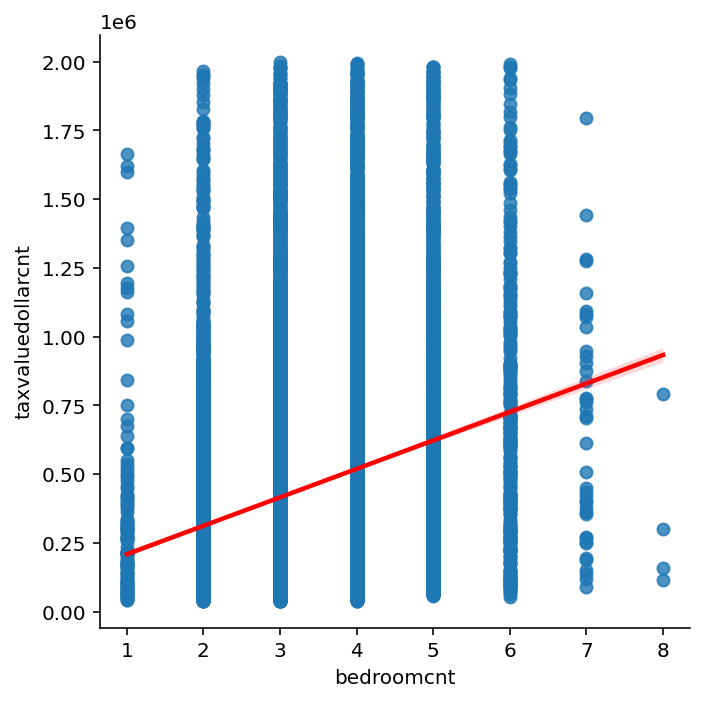

In [54]:
sns.lmplot(x='bedroomcnt', y='taxvaluedollarcnt', data=train.astype('float64'), line_kws={'color': 'red'})
plt.show()

Text(0.5, 1.0, 'Features Correlating with Bedroom Count')

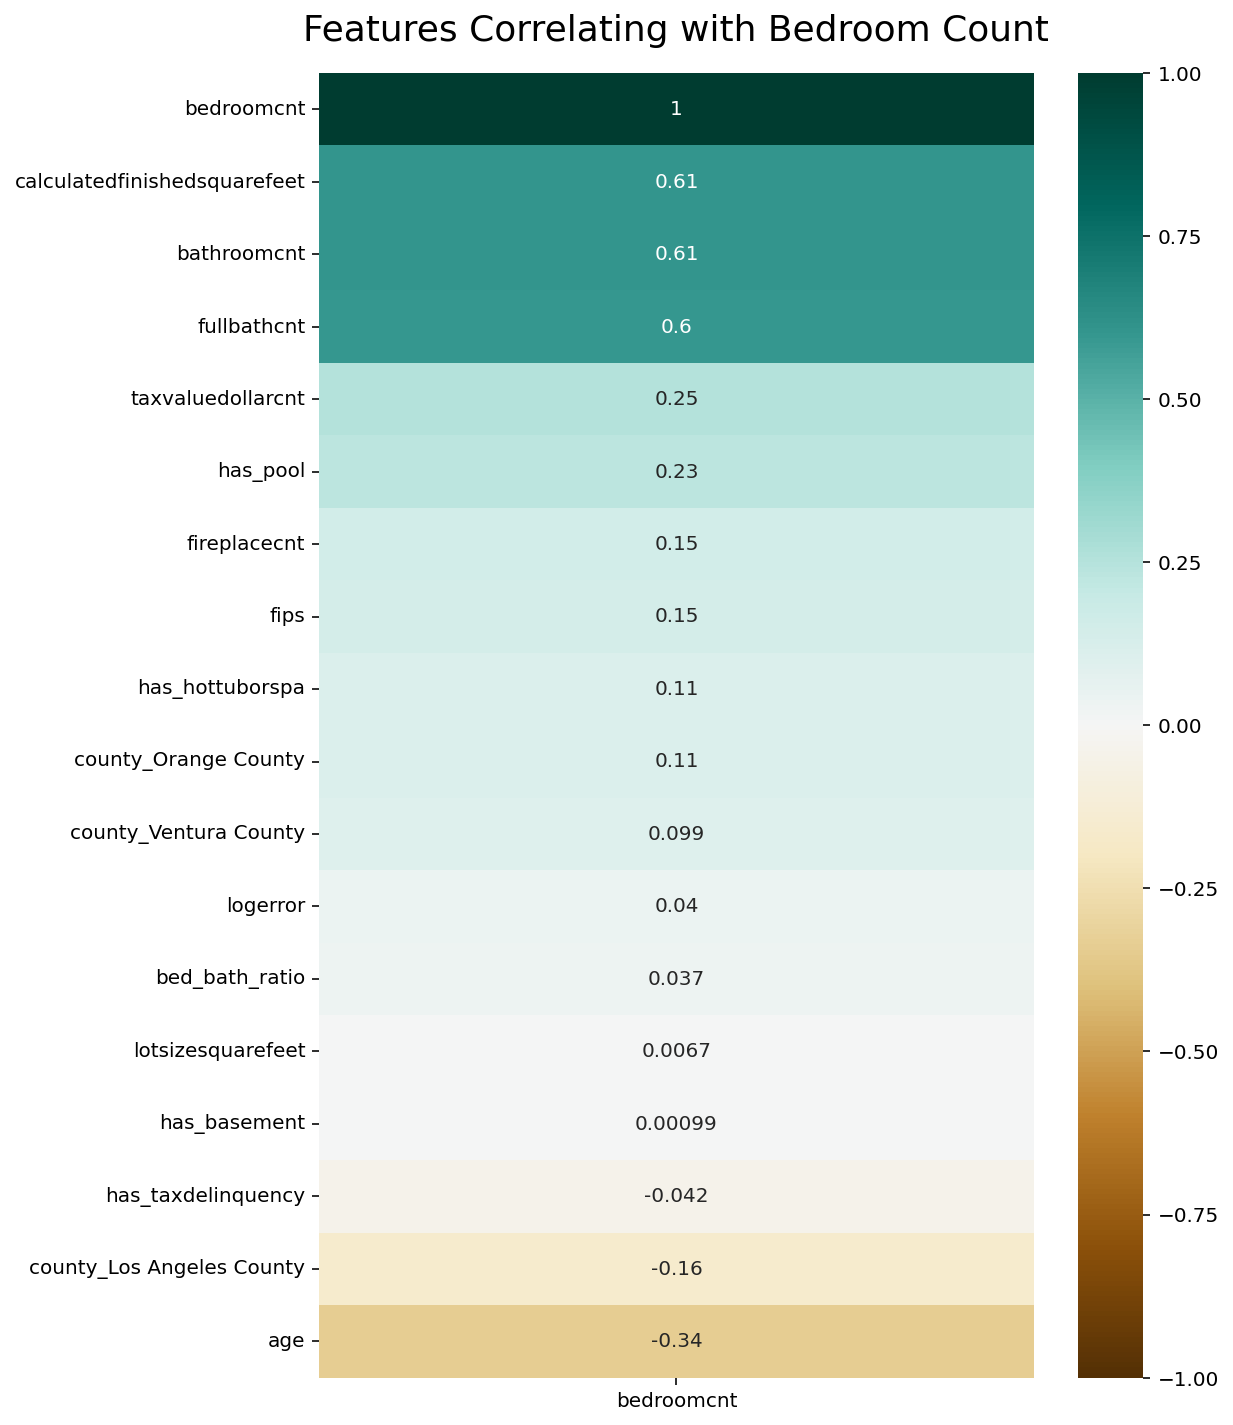

In [55]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['bedroomcnt']].sort_values(by='bedroomcnt', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Bedroom Count', fontdict={'fontsize':18}, pad=16)

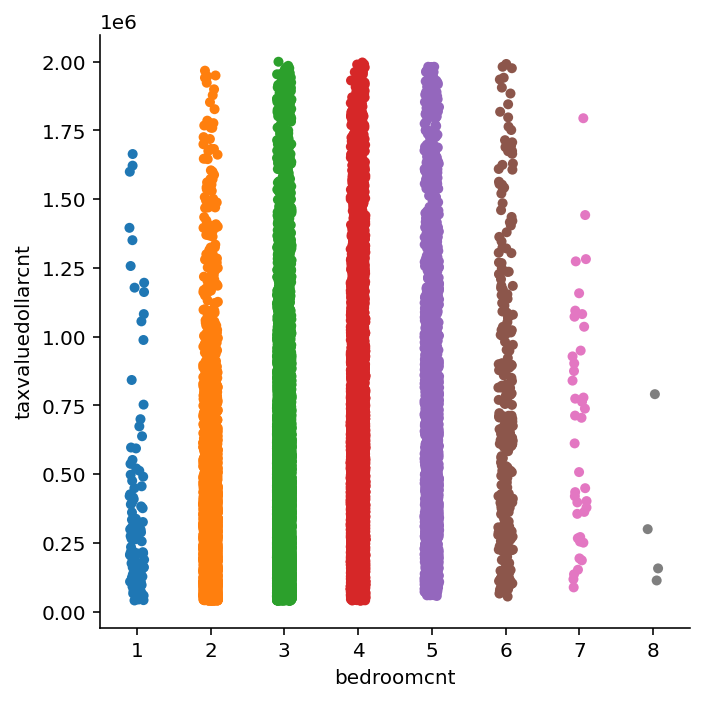

In [56]:
sns.catplot(data=train, y='taxvaluedollarcnt', x='bedroomcnt')

<AxesSubplot:xlabel='bedroomcnt'>

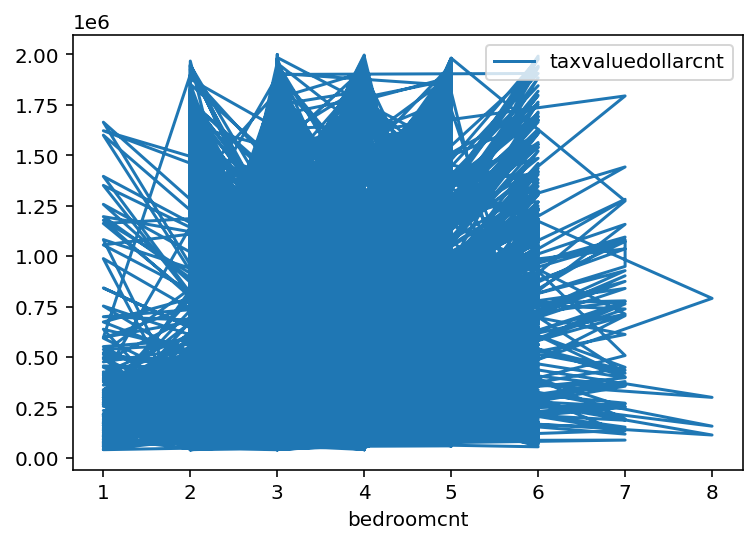

In [57]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'bedroomcnt', y = 'taxvaluedollarcnt', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
#df.plot(x = 'lotsizesquarefeet', y = 'taxvaluedollarcnt', ax = ax, secondary_y = True) 

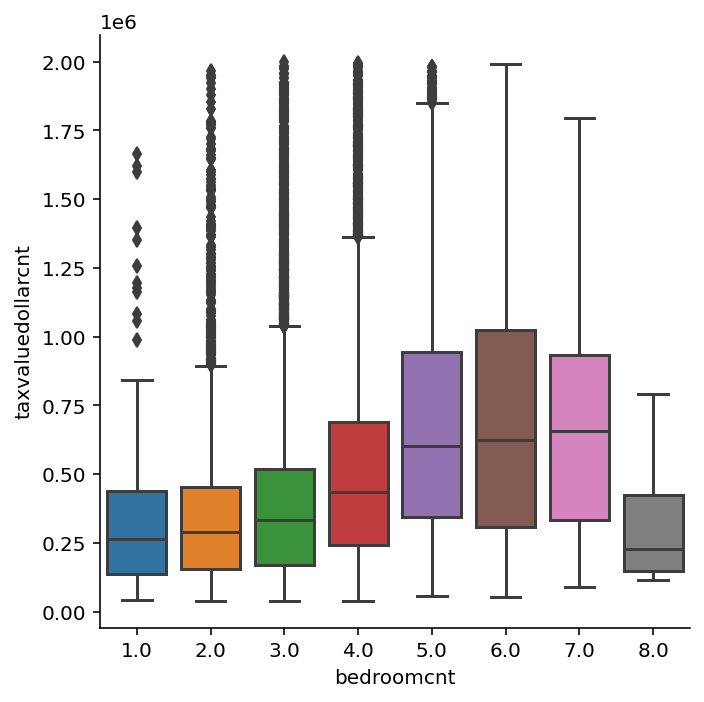

In [58]:
sns.catplot(data=train.astype('float64'), x="bedroomcnt", y="taxvaluedollarcnt", kind="box")

## Test Hypothesis

<div class="alert alert-warning">



# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [59]:
r, p_val = stats.pearsonr(train.bedroomcnt,
                      train.taxvaluedollarcnt)
r, p_val

(0.25335560255202555, 0.0)

In [60]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bedrooms

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [61]:
t_stat, p_val = stats.levene(train.bedroomcnt, train.taxvaluedollarcnt)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bedroomcnt, 
                                    train.taxvaluedollarcnt, 
                                    equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bedroomcnt, 
                                    train.taxvaluedollarcnt, 
                                    equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
t-stat: -214.40589799648995
p-value: 0.0


In [62]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bedrooms

<div class="alert alert-warning">


# Q3: Does the number of Bathrooms impact the Tax Assesment Value?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (bathroomcnt, taxvaluedollarcnt)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (bathroomcnt, taxvaluedollarcnt)**  
  
  
 * Continuous or Discreat?  
  **Continuous (bathroomcnt) vs Continuous (taxvaluedollarcnt) = Pearson’s R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The property Tax Assesed Value does **NOT** have a ```significant Relationhip``` with the number of Bedrooms**.  
      * ```taxvaluedollarcnt``` != ```bathroomcnt```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bedrooms**.  
      * ```taxvaluedollarcnt``` == ```bathroomcnt```  

## Visualization

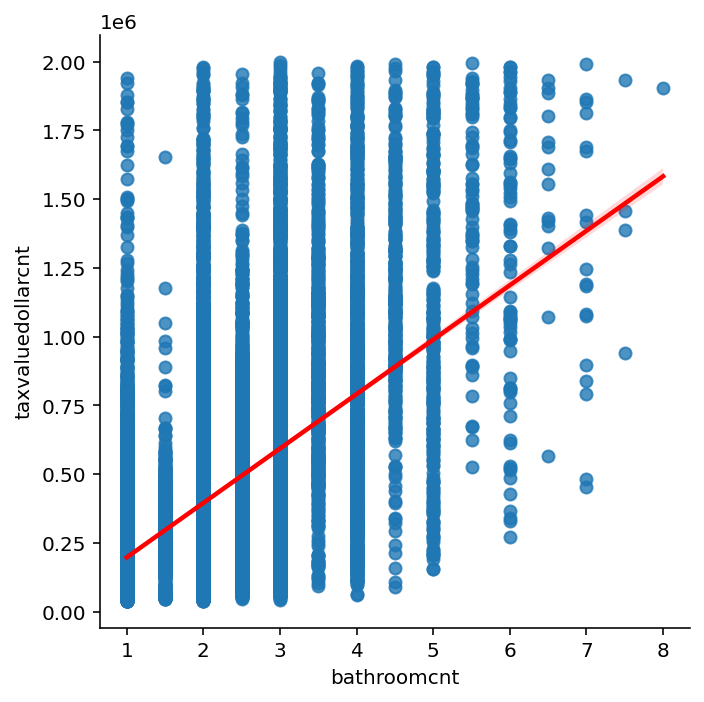

In [63]:
sns.lmplot(x='bathroomcnt', y='taxvaluedollarcnt', data=train.astype('float64'), line_kws={'color': 'red'})
plt.show()

Text(0.5, 1.0, 'Features Correlating with Bathroom Count')

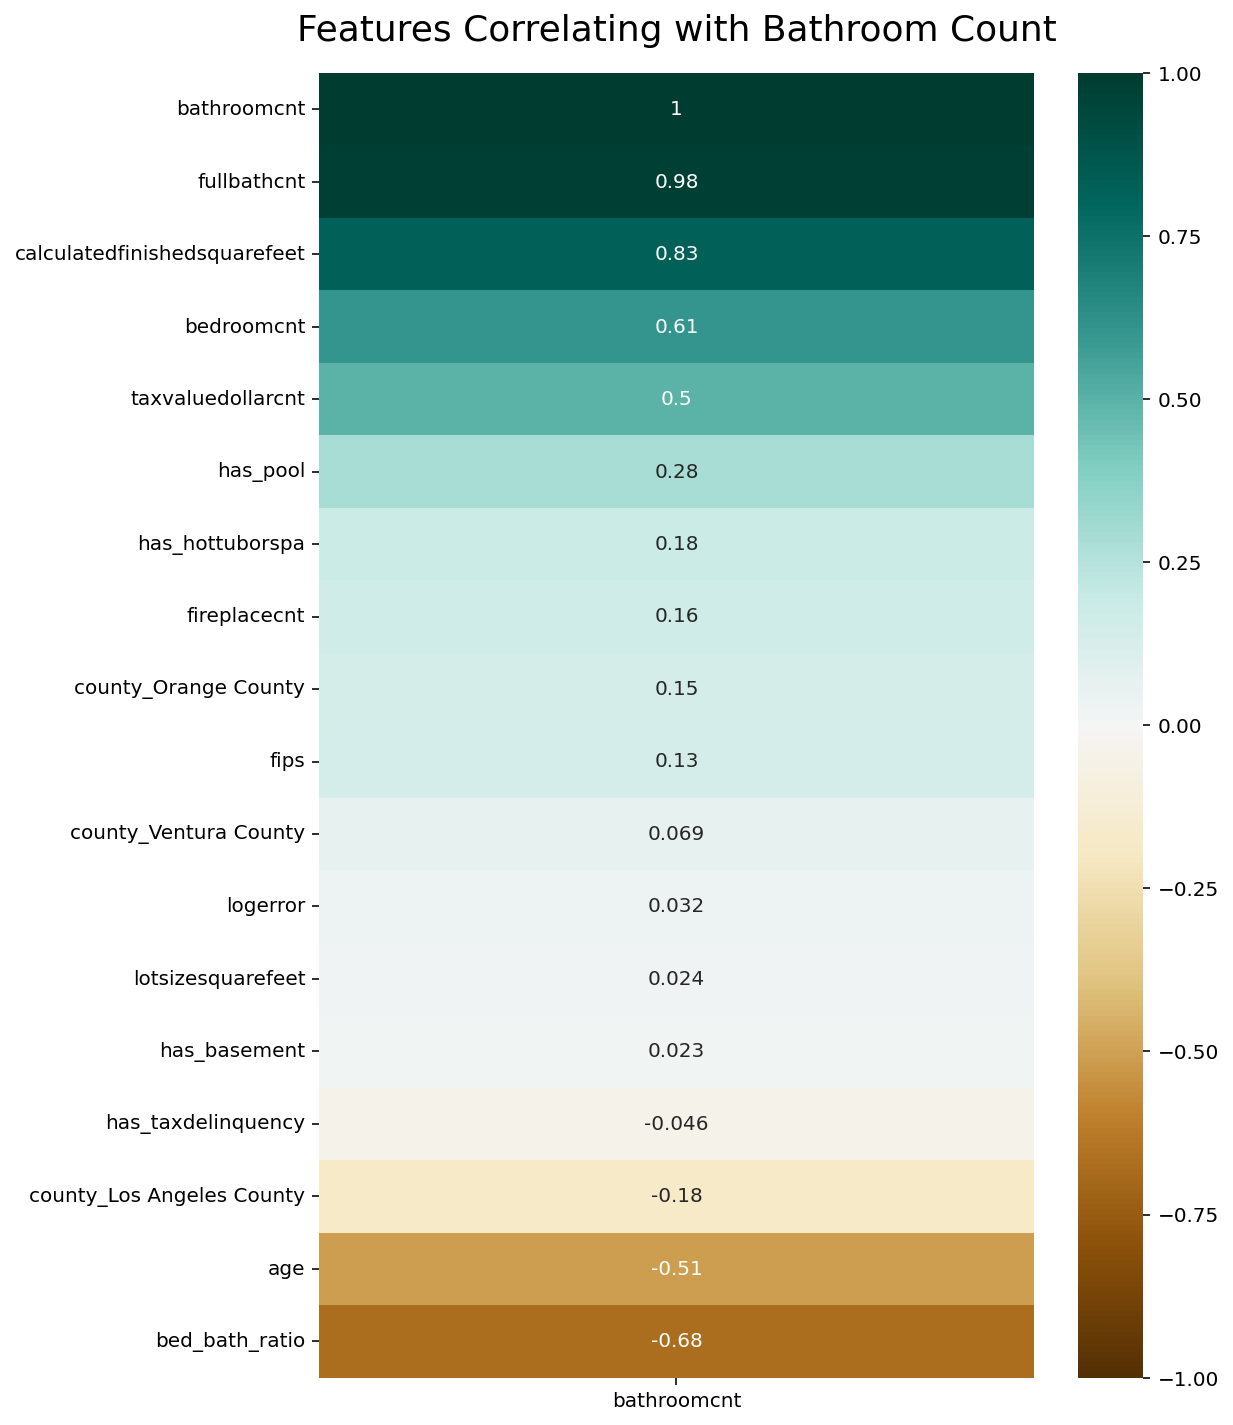

In [64]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['bathroomcnt']].sort_values(by='bathroomcnt', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Bathroom Count', fontdict={'fontsize':18}, pad=16)

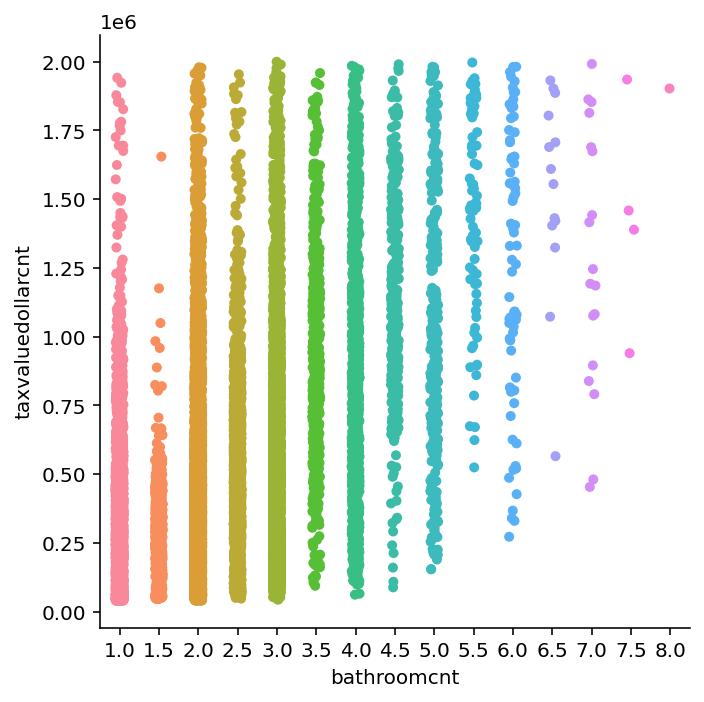

In [65]:
sns.catplot(data=train, y='taxvaluedollarcnt', x='bathroomcnt')

<AxesSubplot:xlabel='bathroomcnt'>

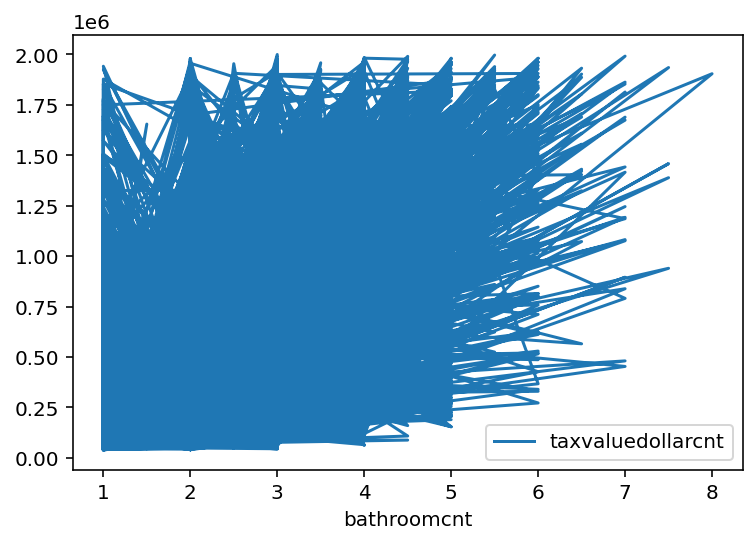

In [66]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'bathroomcnt', y = 'taxvaluedollarcnt', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
#df.plot(x = 'lotsizesquarefeet', y = 'taxvaluedollarcnt', ax = ax, secondary_y = True) 

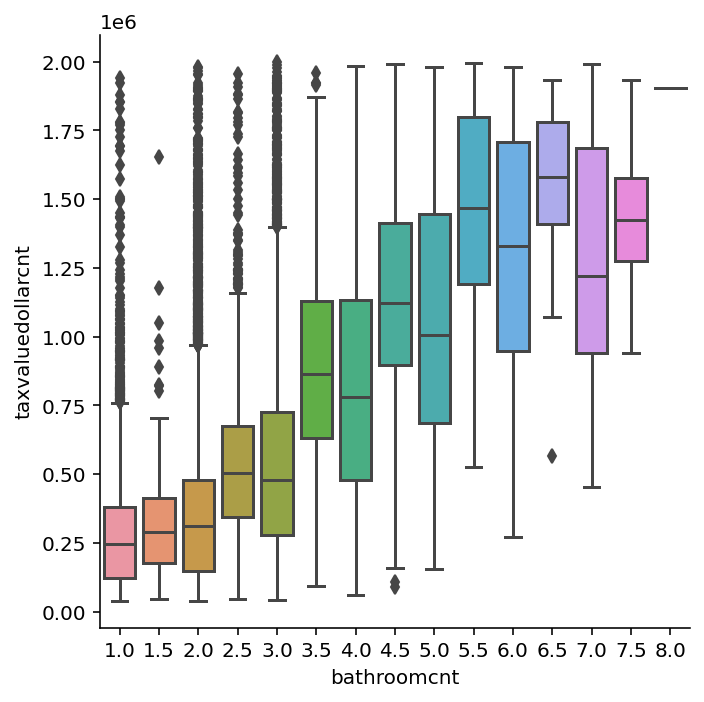

In [67]:
sns.catplot(data=train.astype('float64'), x="bathroomcnt", y="taxvaluedollarcnt", kind="box")

## Test Hypothesis

<div class="alert alert-warning">



# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [68]:
r, p_val = stats.pearsonr(train.bathroomcnt,
                      train.taxvaluedollarcnt)
r, p_val

(0.4979516858258451, 0.0)

In [69]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bathrooms

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [70]:
t_stat, p_val = stats.levene(train.bathroomcnt, train.taxvaluedollarcnt)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bathroomcnt, 
                                    train.taxvaluedollarcnt, 
                                    equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bathroomcnt, 
                                    train.taxvaluedollarcnt, 
                                    equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
t-stat: -214.406400531341
p-value: 0.0


In [71]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bathrooms

<div class="alert alert-warning">


# Q4: Does the number of Bedrooms impact the the number of Bathrooms?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (bedroomcnt, bathroomcnt)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (bedroomcnt, bathroomcnt)**  
  
  
 * Continuous or Discreat?  
  **Continuous (bedroomcnt) vs Continuous (bathroomcnt) = Pearson’s R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The number of Bedrooms does **NOT** have a ```significant Relationhip``` with the number of Bathrooms**.  
      * ```bedroomcnt``` != ```bathroomcnt```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The number of Bedrooms has a ```significant Relationhip``` with the number of Bathrooms**.  
      * ```bedroomcnt``` == ```bathroomcnt```  

## Visualization

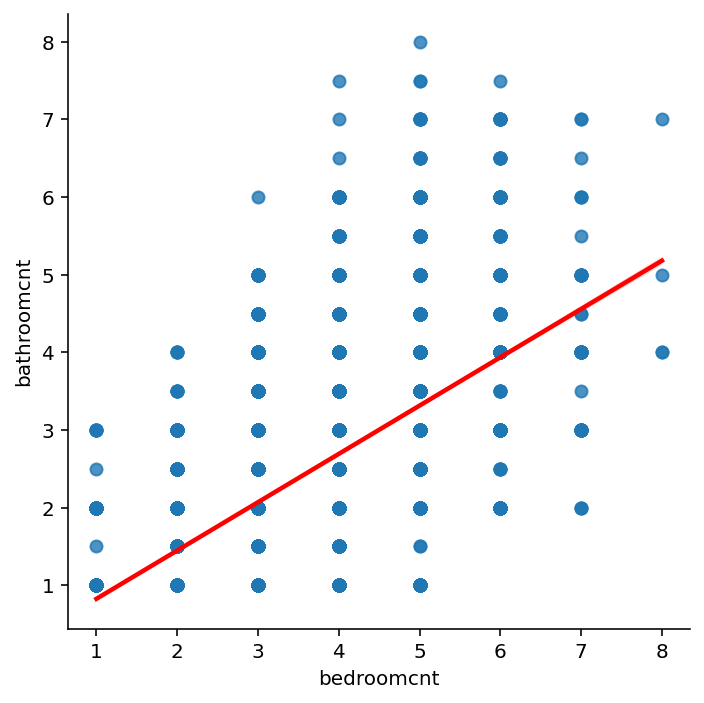

In [72]:
sns.lmplot(x='bedroomcnt', y='bathroomcnt', data=train.astype('float64'), line_kws={'color': 'red'})
plt.show()

Text(0.5, 1.0, 'Features Correlating with Bathroom to Bedroom Ratio')

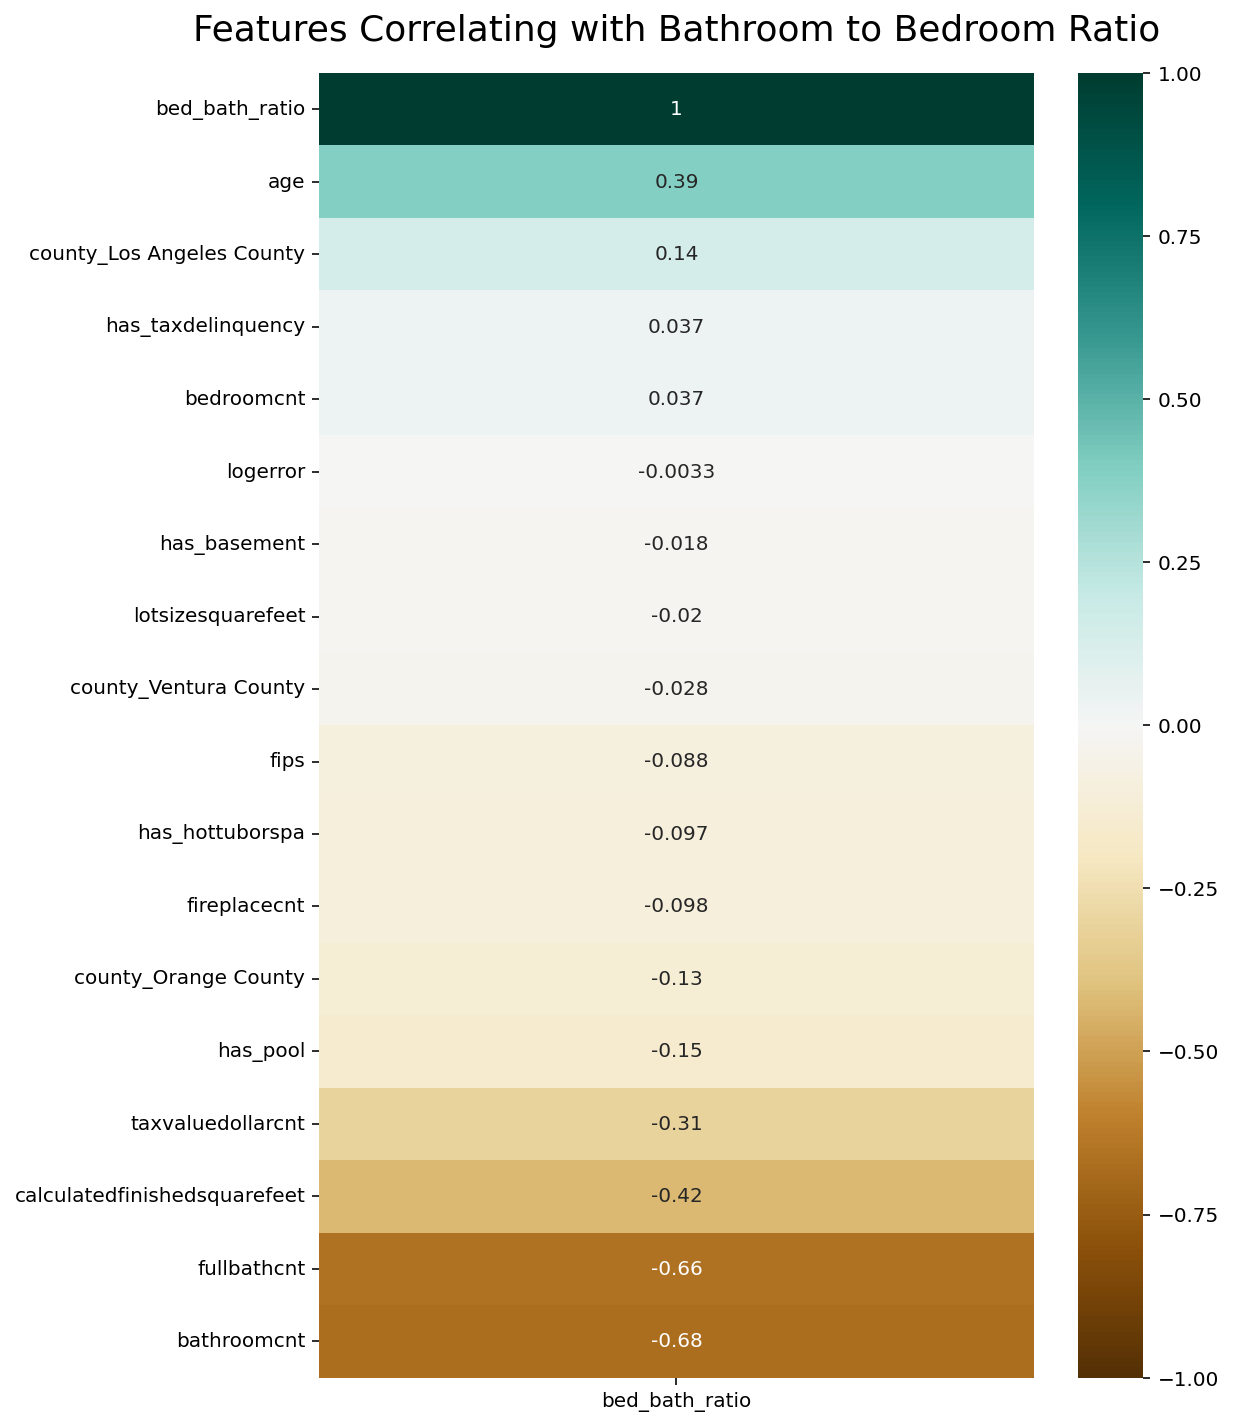

In [89]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['bed_bath_ratio']].sort_values(by='bed_bath_ratio', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Bathroom to Bedroom Ratio', fontdict={'fontsize':18}, pad=16)

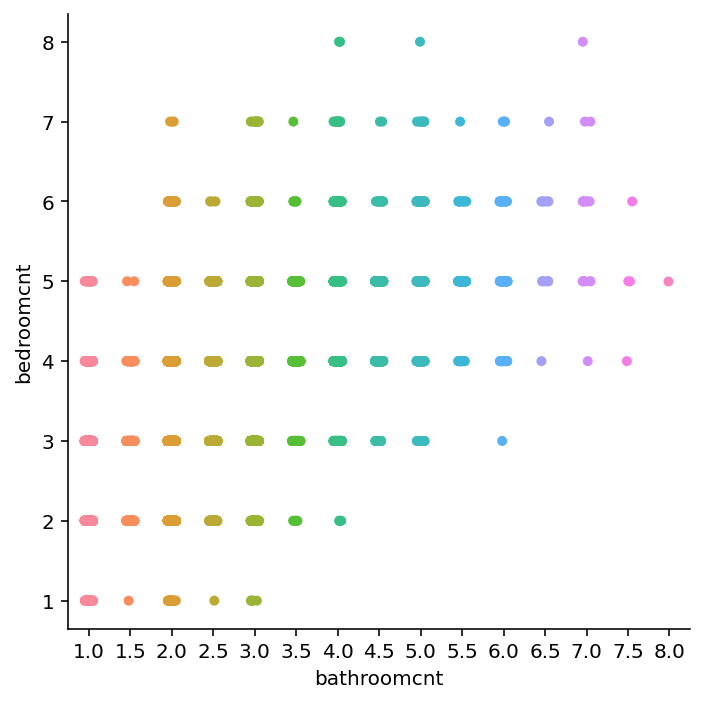

In [74]:
sns.catplot(data=train, x='bathroomcnt', y='bedroomcnt')

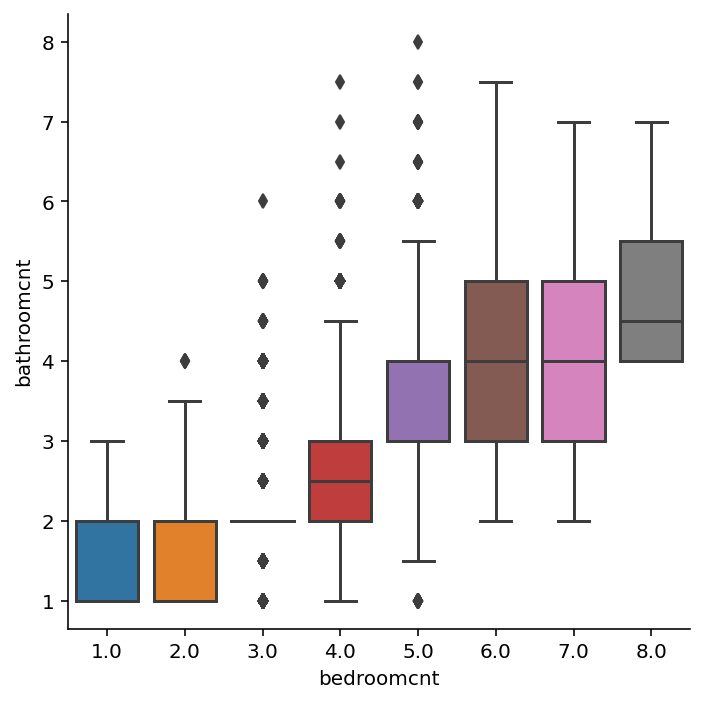

In [75]:
sns.catplot(data=train.astype('float64'), x="bedroomcnt", y="bathroomcnt", kind="box")

## Test Hypothesis

<div class="alert alert-warning">



# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [76]:
r, p_val = stats.pearsonr(train.bedroomcnt,
                      train.bathroomcnt)
r, p_val

(0.605089876003165, 0.0)

In [77]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
    
The number of Bedrooms has a ```significant Relationhip``` with the number of Bathrooms

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [78]:
t_stat, p_val = stats.levene(train.bathroomcnt, train.bedroomcnt)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bathroomcnt, 
                                    train.bedroomcnt, 
                                    equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bathroomcnt, 
                                    train.bedroomcnt, 
                                    equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
t-stat: -143.21765539302004
p-value: 0.0


In [79]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


<div class="alert alert-info">
    
    
The number of Bedrooms has a ```significant Relationhip``` with the number of Bathrooms

In [80]:
train.taxvaluedollarcnt.mean()

449783.8518609292

<div class="alert alert-warning">



# $Chi^2$
**Compute test statistic and probability (Observed, Expected, degf, p-value)**

In [81]:
observed = pd.crosstab(train.bedroomcnt, train.bathroomcnt)
observed

bathroomcnt   1.0  1.5   2.0   2.5   3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  \
bedroomcnt                                                                    
1              80    1    24     1     5    0    0    0    0    0    0    0   
2            2306  137  1381   123   149    5    4    0    0    0    0    0   
3            2067  294  7763  1086  1831  106  175   20   12    0    1    0   
4             127   61  3292   969  3083  307  519  146  109   13   14    1   
5              21    2   202   112   834   90  341  163  144   52   41    6   
6               0    0    32     4    82    5   78   12   34   10   14    6   
7               0    0     3     0    10    1   10    2    7    1    3    1   
8               0    0     0     0     0    0    2    0    1    0    0    0   

bathroomcnt  7.0  7.5  8.0  
bedroomcnt                  
1              0    0    0  
2              0    0    0  
3              0    0    0  
4              1    1    0  
5              6    2    1  
6              8    1    0  
7              2    0    0  
8              1    0    0

In [82]:
chi2, p_val, degf, expected = stats.chi2_contingency(observed)

In [83]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'Chi^2 = {chi2:.4f}')
print(f'p_val = {p_val}')

Observed
[[  80    1   24    1    5    0    0    0    0    0    0    0    0    0
     0]
 [2306  137 1381  123  149    5    4    0    0    0    0    0    0    0
     0]
 [2067  294 7763 1086 1831  106  175   20   12    0    1    0    0    0
     0]
 [ 127   61 3292  969 3083  307  519  146  109   13   14    1    1    1
     0]
 [  21    2  202  112  834   90  341  163  144   52   41    6    6    2
     1]
 [   0    0   32    4   82    5   78   12   34   10   14    6    8    1
     0]
 [   0    0    3    0   10    1   10    2    7    1    3    1    2    0
     0]
 [   0    0    0    0    0    0    2    0    1    0    0    0    1    0
     0]]

Expected
[[  17    1   49    8   23    1    4    1    1    0    0    0    0    0
     0]
 [ 661   71 1824  329  861   73  162   49   44   10   10    2    2    0
     0]
 [2151  231 5937 1073 2802  240  527  160  143   35   34    6    8    1
     0]
 [1392  149 3842  694 1813  155  341  103   92   22   22    4    5    1
     0]
 [ 324   34  896  16

In [84]:
if p_val < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


<div class="alert alert-info">
    
    
The number of Bedrooms has a ```significant Relationhip``` with the number of Bathrooms

<div class="alert alert-info">



# Observations:
* Thing 1
* Thing 2
* Conclusion
    